<a href="https://colab.research.google.com/github/73761985/Rainfall-prediction/blob/main/Improved_stacking_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile as zf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/archive (1).zip',compression='zip')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
num_features = [feature for feature in df.columns if df[feature].dtype=='float']

print("there are {} numerical features-\n ".format(len(num_features)))
print("Columns with numerical features are-\n",num_features)

there are 16 numerical features-
 
Columns with numerical features are-
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [9]:
cat_features = [feature for feature in df.columns if df[feature].dtype=='O']

print("there are {} categorical features-\n ".format(len(cat_features)))
print("Columns with categorical features are-\n",cat_features)

there are 7 categorical features-
 
Columns with categorical features are-
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)


In [11]:

plt.figure(figsize=(10, 6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.20
)
plt.show()


<Figure size 1000x600 with 0 Axes>

In [12]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df[df['RainTomorrow']=="No"].shape

(110316, 23)

In [14]:
df[df['RainTomorrow']=="Yes"].shape

(31877, 23)

In [15]:
df['RainTomorrow'].isnull().sum()

3267

In [16]:
df['RainToday'].isnull().sum()

3261

In [17]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_per = (missing/len(df))*100
pd.DataFrame({"Missing_Records":missing,"percentage of missing data":missing_per.values})

Missing_Records  percentage of missing data
Sunshine                 69835                   48.009762
Evaporation              62790                   43.166506
Cloud3pm                 59358                   40.807095
Cloud9am                 55888                   38.421559
Pressure9am              15065                   10.356799
Pressure3pm              15028                   10.331363
WindDir9am               10566                    7.263853
WindGustDir              10326                    7.098859
WindGustSpeed            10263                    7.055548
Humidity3pm               4507                    3.098446
WindDir3pm                4228                    2.906641
Temp3pm                   3609                    2.481094
RainTomorrow              3267                    2.245978
Rainfall                  3261                    2.241853
RainToday                 3261                    2.241853
WindSpeed3pm              3062                    2.105046
Humidity9am               2654                    1.824557
Temp9am                   1767                    1.214767
WindSpeed9am              1767                    1.214767
MinTemp                   1485                    1.020899
MaxTemp                   1261                    0.866905
Location                     0                    0.000000
Date                         0                    0.000000

In [18]:
# sns.pairplot(df)

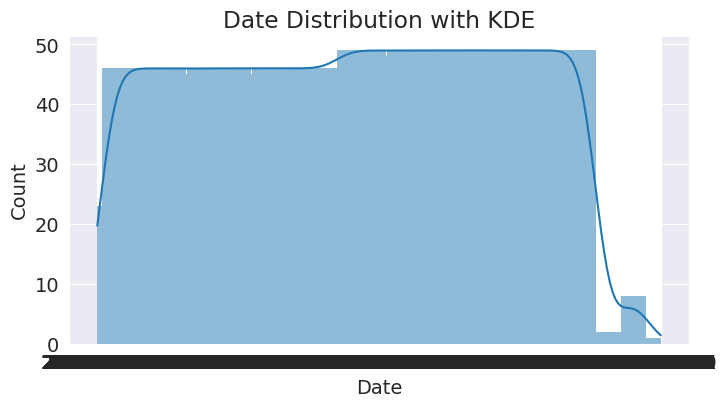

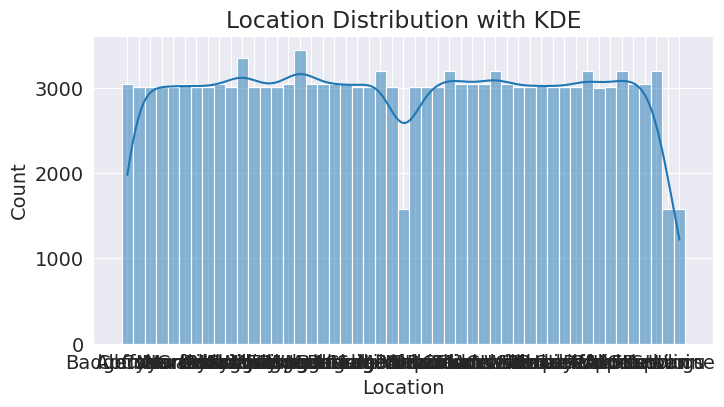

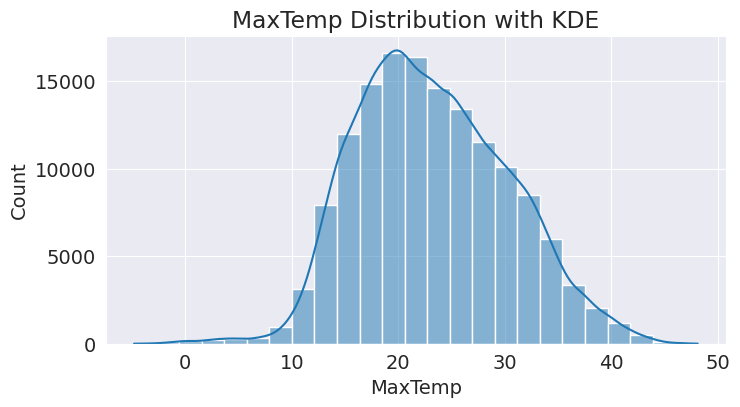

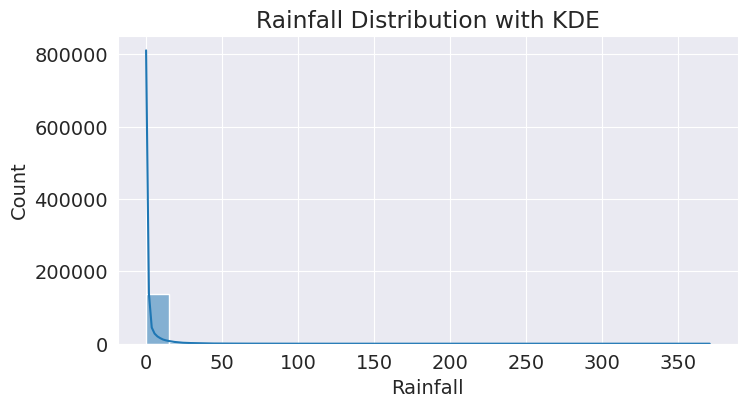

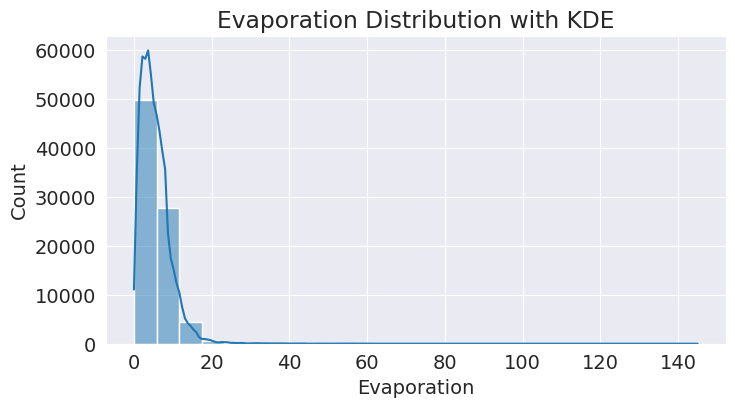

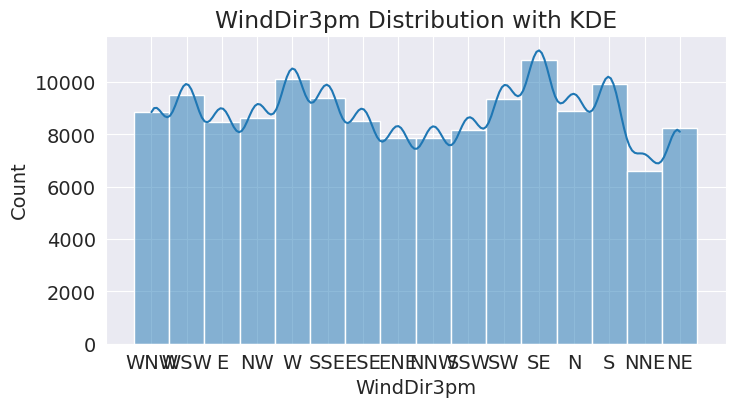

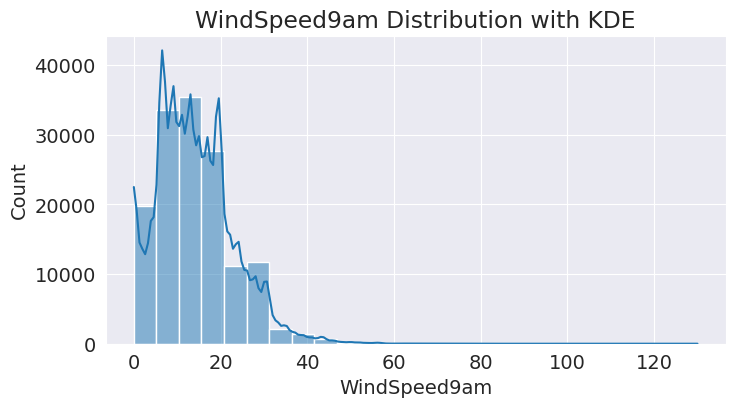

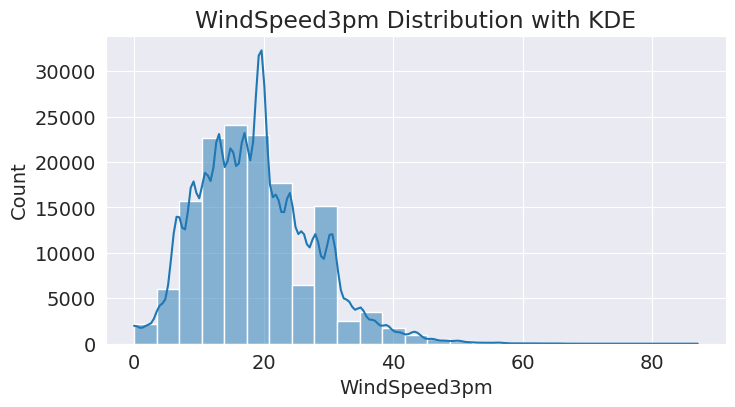

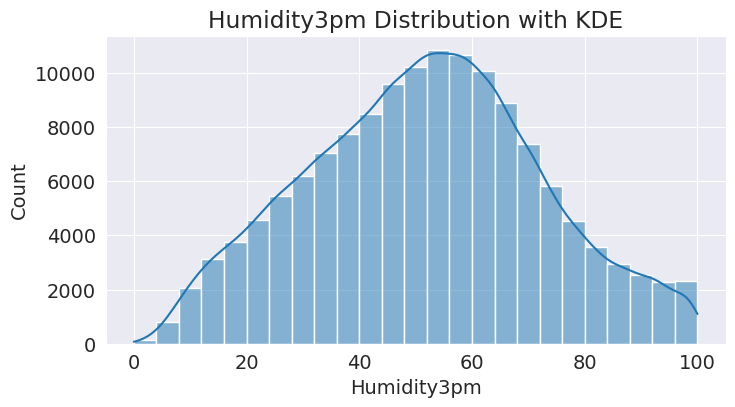

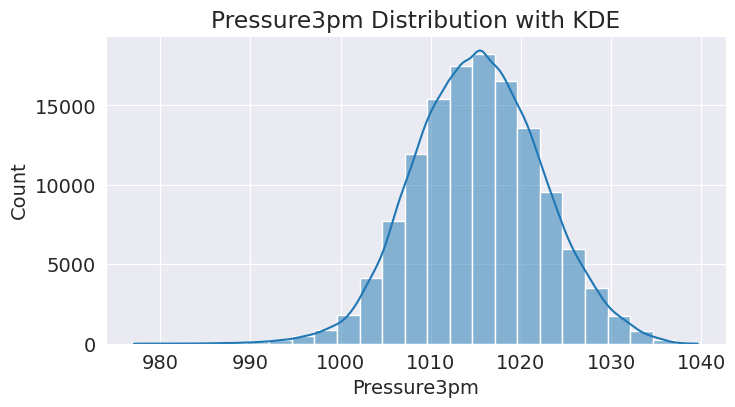

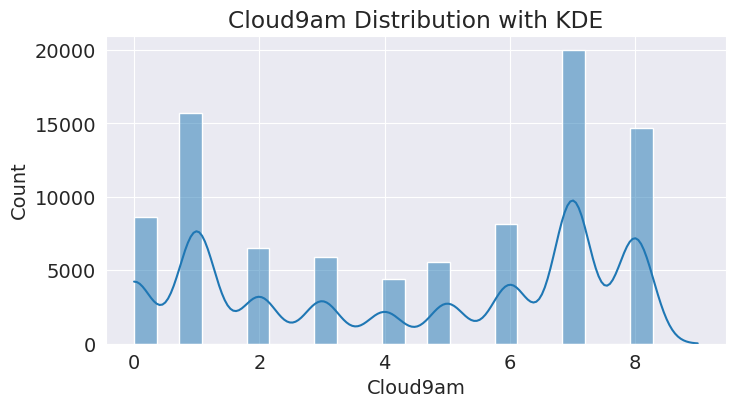

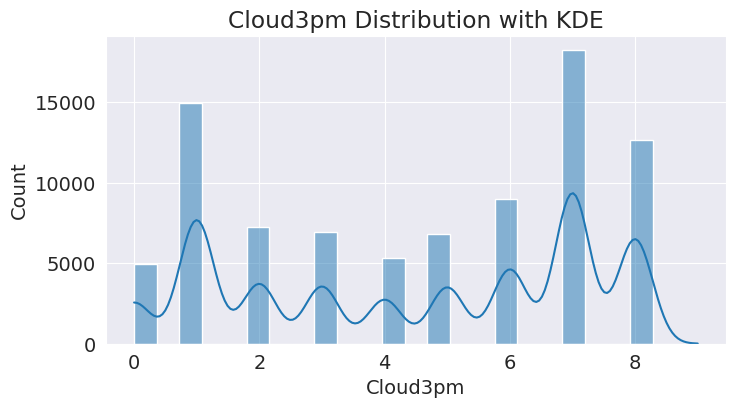

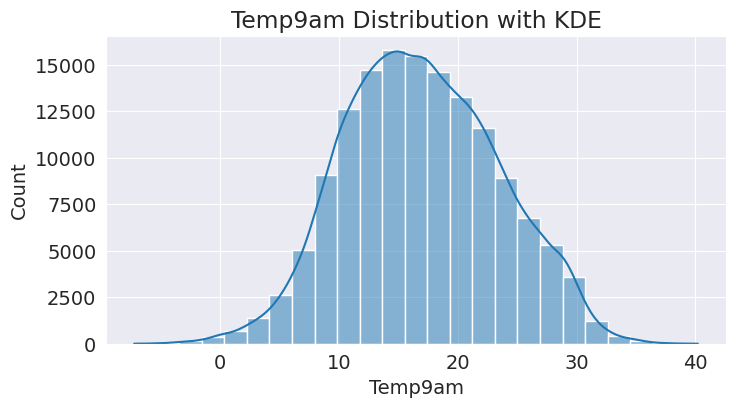

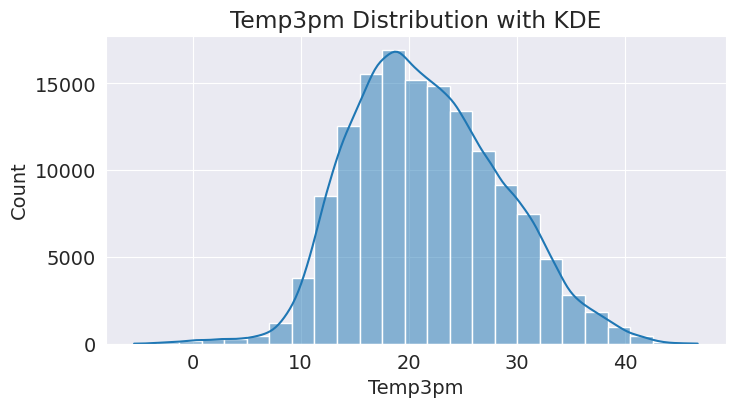

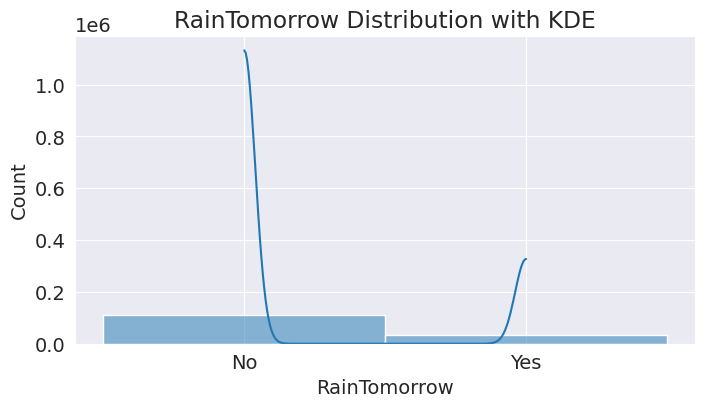

In [19]:
for feature in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=25, kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"{feature} Distribution with KDE")
    plt.show()

In [20]:
data=df.copy()

In [21]:
columns_to_exclude = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
filtered_data = data.drop(columns=columns_to_exclude)


<ipython-input-22-d9ad4f6c942b>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


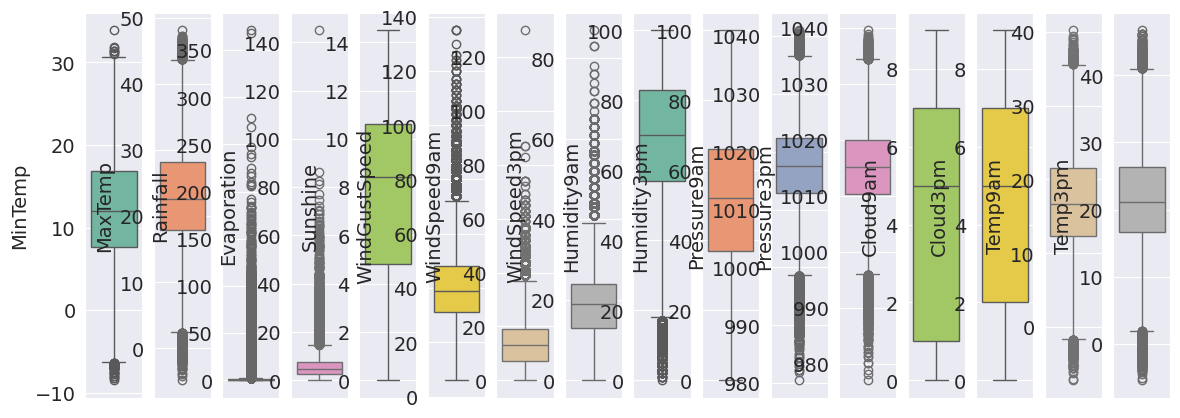

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=len(filtered_data.columns), figsize=(14, 5))
colors = sns.color_palette('Set2', n_colors=len(filtered_data.columns))

for i, column in enumerate(filtered_data.columns):
    sns.boxplot(y=filtered_data[column], ax=axes[i], color=colors[i % len(colors)])
    axes[i].set_xlabel(None)

plt.tight_layout()
plt.show()

In [23]:
data1=df.copy()

In [24]:
data2= data1.dropna(subset=['RainToday','RainTomorrow'])

In [25]:
data2.shape

(140787, 23)

In [26]:
data2[data2['RainTomorrow']=="No"].shape

(109586, 23)

In [27]:
data2[data2['RainTomorrow']=="Yes"].shape

(31201, 23)

In [28]:
def calculate_percentage_of_yes_no(data, column_name='RainTomorrow'):
    value_counts = data[column_name].value_counts(normalize=True) * 100
    yes_percentage = value_counts.get('Yes', 0)
    no_percentage = value_counts.get('No', 0)
    print(f"Percentage of 'Yes': {yes_percentage:.2f}%")
    print(f"Percentage of 'No': {no_percentage:.2f}%")
    return {'Yes': yes_percentage, 'No': no_percentage}
percentages = calculate_percentage_of_yes_no(data2, 'RainTomorrow')
print(percentages)


Percentage of 'Yes': 22.16%
Percentage of 'No': 77.84%
{'Yes': 22.161847329654016, 'No': 77.83815267034598}


In [29]:
 px.histogram(data2,x="Location",title="Location vs Rainy Days",color="RainToday")

In [30]:
px.histogram(data2,x="Temp3pm",title="Temp. at 3pm vs RainTomorrow",color="RainTomorrow")

In [31]:
#mean temperature at 3pm depending on RainTomorrow
print("mean temp when it rains tomorrow")
print(data2[["RainTomorrow","Temp3pm"]].groupby("RainTomorrow").mean())

mean temp when it rains tomorrow
                Temp3pm
RainTomorrow           
No            22.405090
Yes           19.181358


In [32]:
px.histogram(data2,x="RainTomorrow",color="RainToday",title="RainTomorrow vs RainToday")


In [33]:
px.scatter(data2.sample(2000),title="Min.Temp vs Max.Temp",x="MinTemp",y="MaxTemp",color="RainToday")

In [34]:
px.scatter(data2.sample(2000),title="Temp (3 pm) vs Humidity (3 pm) " , x="Temp3pm",y='Humidity3pm',color='RainTomorrow')

In [35]:
data2.drop(['Cloud9am', 'Cloud3pm','Evaporation','Sunshine'], axis=1)

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0       2008-12-01   Albury     13.4     22.9       0.6           W   
1       2008-12-02   Albury      7.4     25.1       0.0         WNW   
2       2008-12-03   Albury     12.9     25.7       0.0         WSW   
3       2008-12-04   Albury      9.2     28.0       0.0          NE   
4       2008-12-05   Albury     17.5     32.3       1.0           W   
...            ...      ...      ...      ...       ...         ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0           E   
145455  2017-06-21    Uluru      2.8     23.4       0.0           E   
145456  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
145457  2017-06-23    Uluru      5.4     26.9       0.0           N   
145458  2017-06-24    Uluru      7.8     27.0       0.0          SE   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0                44.0          W        WNW          20.0          24.0   
1                44.0        NNW        WSW           4.0          22.0   
2                46.0          W        WSW          19.0          26.0   
3                24.0         SE          E          11.0           9.0   
4                41.0        ENE         NW           7.0          20.0   
...               ...        ...        ...           ...           ...   
145454           31.0        ESE          E          15.0          13.0   
145455           31.0         SE        ENE          13.0          11.0   
145456           22.0         SE          N          13.0           9.0   
145457           37.0         SE        WNW           9.0           9.0   
145458           28.0        SSE          N          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0              71.0         22.0       1007.7       1007.1     16.9     21.8   
1              44.0         25.0       1010.6       1007.8     17.2     24.3   
2              38.0         30.0       1007.6       1008.7     21.0     23.2   
3              45.0         16.0       1017.6       1012.8     18.1     26.5   
4              82.0         33.0       1010.8       1006.0     17.8     29.7   
...             ...          ...          ...          ...      ...      ...   
145454         59.0         27.0       1024.7       1021.2      9.4     20.9   
145455         51.0         24.0       1024.6       1020.3     10.1     22.4   
145456         56.0         21.0       1023.5       1019.1     10.9     24.5   
145457         53.0         24.0       1021.0       1016.8     12.5     26.1   
145458         51.0         24.0       1019.4       1016.5     15.1     26.0   

       RainToday RainTomorrow  
0             No           No  
1             No           No  
2             No           No  
3             No           No  
4             No           No  
...          ...          ...  
145454        No           No  
145455        No           No  
145456        No           No  
145457        No           No  
145458        No           No  

[140787 rows x 19 columns]

In [36]:
data1.dropna(subset=['RainToday','RainTomorrow'], inplace = True)

In [37]:
data1.drop(['Cloud9am', 'Cloud3pm','Evaporation','Sunshine'], axis=1, inplace=True)

<Figure size 1000x600 with 0 Axes>

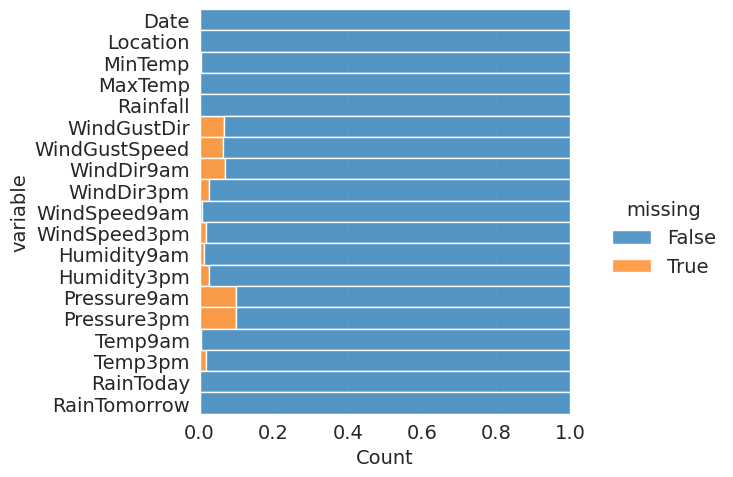

In [38]:
plt.figure(figsize=(10,6))
sns.displot( data=data1.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25 )

In [39]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1['Year'] = data1['Date'].dt.year
data1['Month'] = data1['Date'].dt.month
data1.drop('Date',inplace=True, axis=1)
data1

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0        Albury     13.4     22.9       0.6           W           44.0   
1        Albury      7.4     25.1       0.0         WNW           44.0   
2        Albury     12.9     25.7       0.0         WSW           46.0   
3        Albury      9.2     28.0       0.0          NE           24.0   
4        Albury     17.5     32.3       1.0           W           41.0   
...         ...      ...      ...       ...         ...            ...   
145454    Uluru      3.5     21.8       0.0           E           31.0   
145455    Uluru      2.8     23.4       0.0           E           31.0   
145456    Uluru      3.6     25.3       0.0         NNW           22.0   
145457    Uluru      5.4     26.9       0.0           N           37.0   
145458    Uluru      7.8     27.0       0.0          SE           28.0   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               W        WNW          20.0          24.0         71.0   
1             NNW        WSW           4.0          22.0         44.0   
2               W        WSW          19.0          26.0         38.0   
3              SE          E          11.0           9.0         45.0   
4             ENE         NW           7.0          20.0         82.0   
...           ...        ...           ...           ...          ...   
145454        ESE          E          15.0          13.0         59.0   
145455         SE        ENE          13.0          11.0         51.0   
145456         SE          N          13.0           9.0         56.0   
145457         SE        WNW           9.0           9.0         53.0   
145458        SSE          N          13.0           7.0         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  \
0              22.0       1007.7       1007.1     16.9     21.8        No   
1              25.0       1010.6       1007.8     17.2     24.3        No   
2              30.0       1007.6       1008.7     21.0     23.2        No   
3              16.0       1017.6       1012.8     18.1     26.5        No   
4              33.0       1010.8       1006.0     17.8     29.7        No   
...             ...          ...          ...      ...      ...       ...   
145454         27.0       1024.7       1021.2      9.4     20.9        No   
145455         24.0       1024.6       1020.3     10.1     22.4        No   
145456         21.0       1023.5       1019.1     10.9     24.5        No   
145457         24.0       1021.0       1016.8     12.5     26.1        No   
145458         24.0       1019.4       1016.5     15.1     26.0        No   

       RainTomorrow  Year  Month  
0                No  2008     12  
1                No  2008     12  
2                No  2008     12  
3                No  2008     12  
4                No  2008     12  
...             ...   ...    ...  
145454           No  2017      6  
145455           No  2017      6  
145456           No  2017      6  
145457           No  2017      6  
145458           No  2017      6  

[140787 rows x 20 columns]

<Axes: xlabel='Year', ylabel='count'>

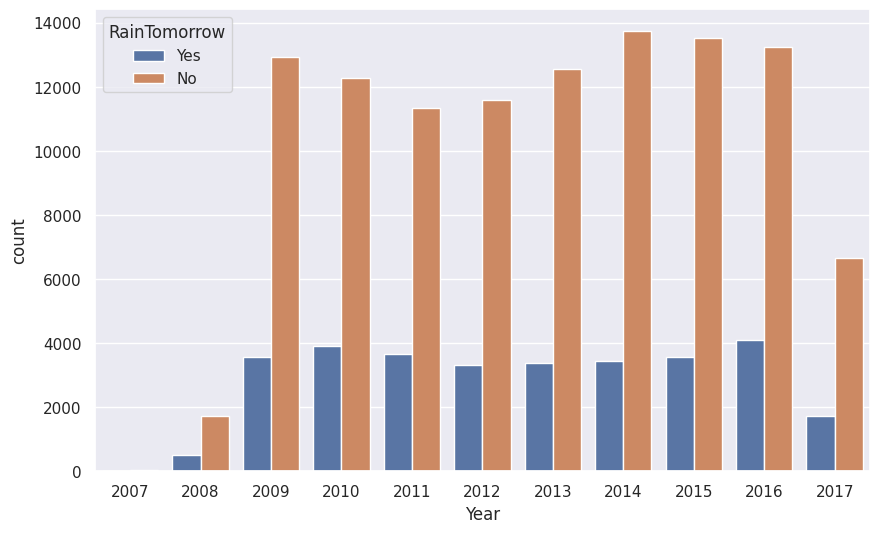

In [40]:
sns.set_theme(style='darkgrid')
sns.countplot(x='Year', hue='RainTomorrow', data=data1)

<Axes: xlabel='Month', ylabel='count'>

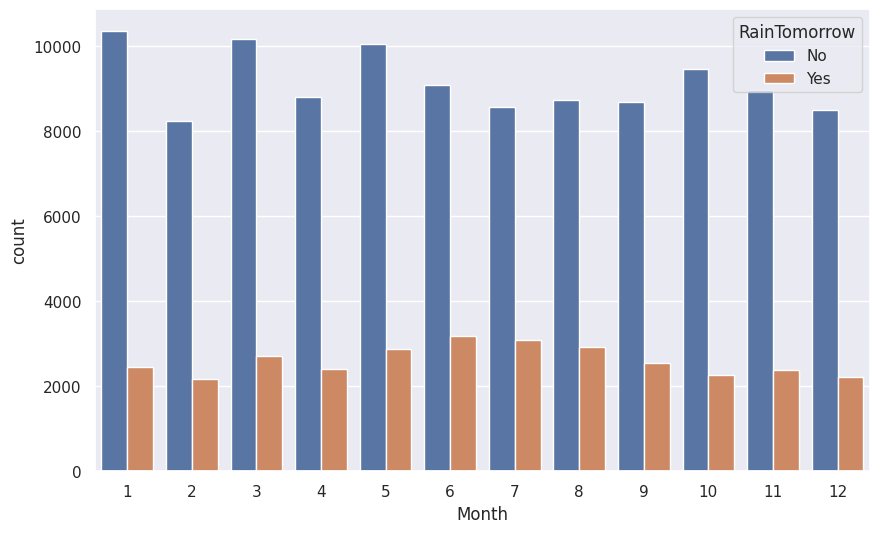

In [41]:
sns.countplot(x='Month', hue='RainTomorrow', data=data1)

In [42]:
#Listing columns with same datatype in vector
num_features = [column_name for column_name in data1.columns if data1[column_name].dtype=='float64']
cat_features = [column_name for column_name in data1.columns if data1[column_name].dtype=='object' or data1[column_name].dtype=='int64']
print("Columns with numerical datatypes-\n",(num_features))
print("columns with categorical datatypes-\n",(cat_features))

Columns with numerical datatypes-
 ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
columns with categorical datatypes-
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [43]:
#List of numbers of different categorical values in each categorical columns
print(data1[cat_features].nunique())

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1[num_features]=scaler.fit_transform(data1[num_features])
data1[num_features].head()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.189757 -0.047104 -0.206727       0.296762      0.676275      0.610232   
1 -0.747179  0.262125 -0.277606       0.296762     -1.124274      0.382909   
2  0.111679  0.346460 -0.277606       0.444058      0.563741      0.837555   
3 -0.466098  0.669744 -0.277606      -1.176193     -0.336533     -1.094689   
4  0.829996  1.274146 -0.159474       0.075819     -0.786671      0.155586   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0     0.113996    -1.415339    -1.401098    -1.159562 -0.013403  0.015397  
1    -1.302317    -1.271158    -0.992926    -1.060065  0.032779  0.375743  
2    -1.617054    -1.030857    -1.415173    -0.932140  0.617756  0.217191  
3    -1.249861    -1.703700    -0.007682    -0.349372  0.171326  0.692849  
4     0.691012    -0.886677    -0.964776    -1.315914  0.125144  1.154093

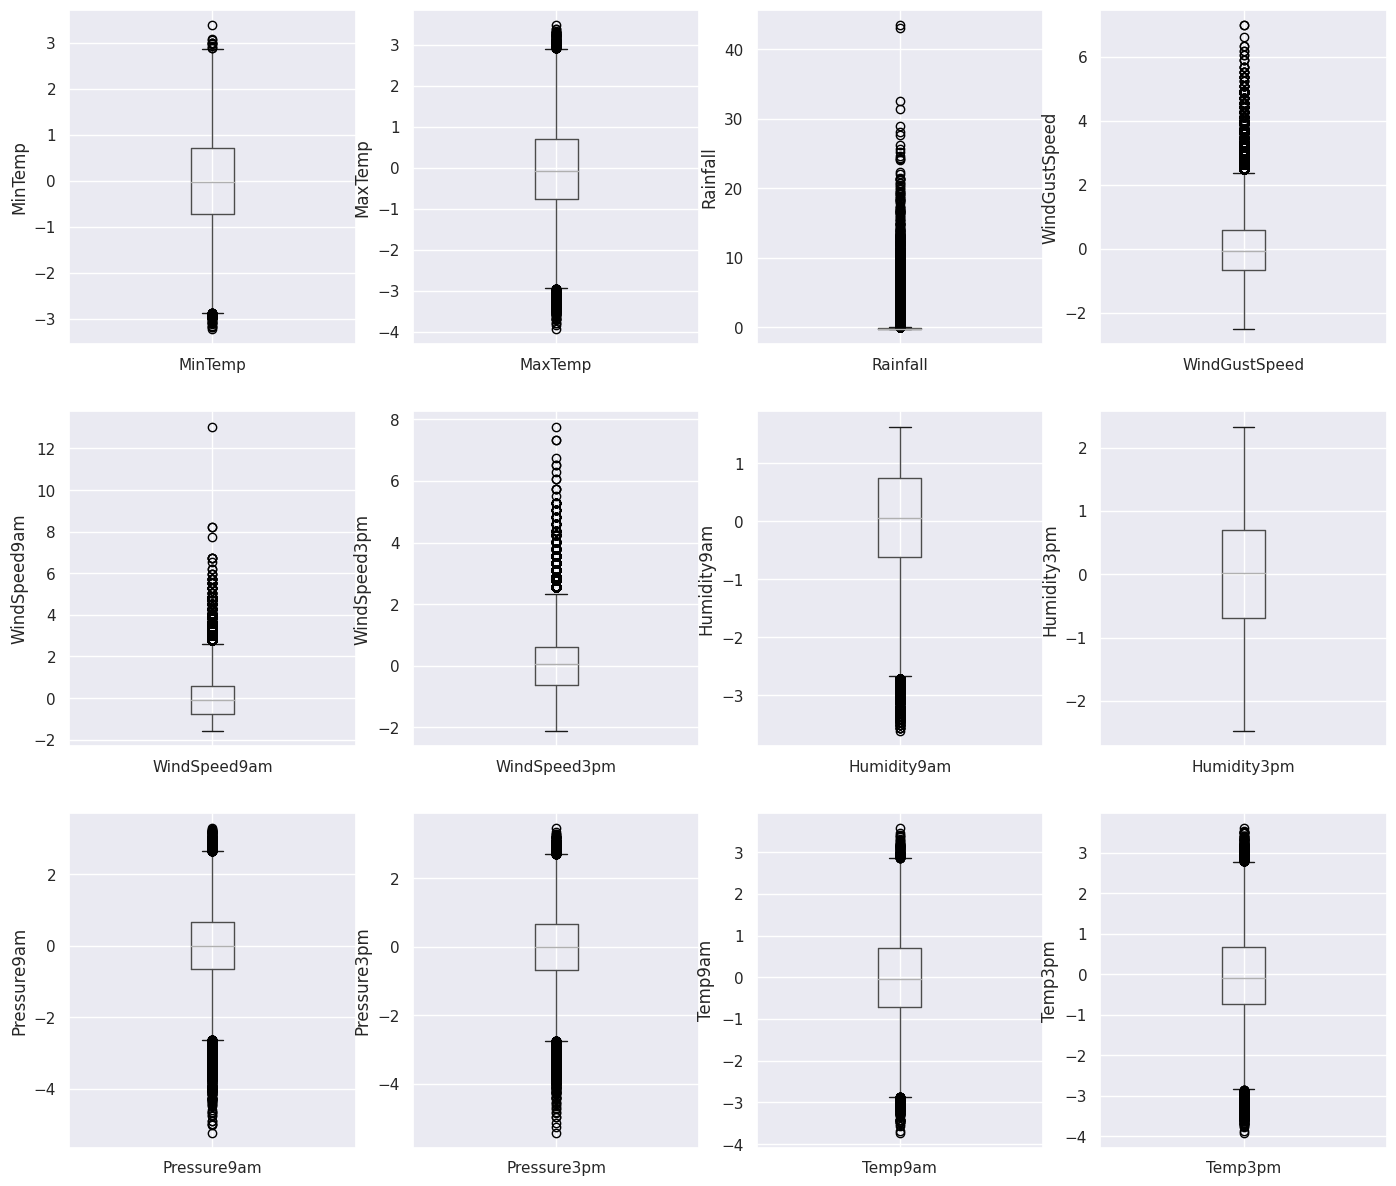

In [45]:
#Creating boxplot for every numerical columns in data
plt.figure(figsize=(17, 20))
for i in range(len(num_features)):
    plt.subplot(4, 4, i+1)
    fig = data1.boxplot(column=num_features[i])
    fig.set_title("")
    fig.set_ylabel(num_features[i])
plt.show()

In [46]:
print("count of `RainTomorrow` before removing outliers")
print(Counter(data1["RainTomorrow"]))

count of `RainTomorrow` before removing outliers
Counter({'No': 109586, 'Yes': 31201})


In [47]:
#Removing outliers from numerical columns of the dataset
Q1 = data1[num_features].quantile(0.25)
Q3 = data1[num_features].quantile(0.75)
IQR = Q3-Q1
pd.concat([Q1,Q3,IQR],axis=1,keys=['Q1','Q2','IQR'])

Q1        Q2       IQR
MinTemp       -0.715947  0.720687  1.436634
MaxTemp       -0.749897  0.711912  1.461809
Rainfall      -0.277606 -0.183101  0.094505
WindGustSpeed -0.660658  0.591353  1.252012
WindSpeed9am  -0.786671  0.563741  1.350412
WindSpeed3pm  -0.640043  0.610232  1.250275
Humidity9am   -0.620389  0.743468  1.363857
Humidity3pm   -0.694436  0.699310  1.393746
Pressure9am   -0.655128  0.667914  1.323042
Pressure3pm   -0.690504  0.674027  1.364531
Temp9am       -0.721532  0.710120  1.431653
Temp3pm       -0.734125  0.678435  1.412560

In [48]:
for i, feature in enumerate(num_features):
    data1[feature] = np.where(data1[feature] > Q3[i] + 1.5 * IQR[i], Q3[i] + 1.5 * IQR[i], data1[feature])
    data1[feature] = np.where(data1[feature] < Q1[i] - 1.5 * IQR[i], Q1[i] - 1.5 * IQR[i], data1[feature])


In [49]:
data1[num_features].describe()

MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  140319.000000  140480.000000  140787.000000  131682.000000   
mean        0.000027       0.000401      -0.220227      -0.014271   
std         0.999860       0.997879       0.093543       0.954742   
min        -2.870899      -2.942610      -0.277606      -2.501852   
25%        -0.715947      -0.749897      -0.277606      -0.660658   
50%        -0.028861      -0.089272      -0.277606      -0.071477   
75%         0.720687       0.711912      -0.183101       0.591353   
max         2.875639       2.904625      -0.041343       2.469370   

        WindSpeed9am   WindSpeed3pm    Humidity9am   Humidity3pm  \
count  139732.000000  138256.000000  139270.000000  1.372860e+05   
mean       -0.010052      -0.009993       0.002823  4.968613e-17   
std         0.966274       0.968561       0.991858  1.000004e+00   
min        -1.574411      -2.117641      -2.666174 -2.472663e+00   
25%        -0.786671      -0.640043      -0.620389 -6.944358e-01   
50%        -0.111465       0.041925       0.061540  2.646732e-02   
75%         0.563741       0.610232       0.743468  6.993102e-01   
max         2.589359       2.485644       1.635221  2.333357e+00   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  
count  127044.000000  127018.000000  140131.000000  138163.000000  
mean        0.003089       0.001995       0.000146       0.000339  
std         0.987676       0.991332       0.998926       0.996237  
min        -2.639691      -2.737301      -2.869011      -2.852965  
25%        -0.655128      -0.690504      -0.721532      -0.734125  
50%        -0.007682      -0.008239      -0.044191      -0.085501  
75%         0.667914       0.674027       0.710120       0.678435  
max         2.652477       2.720824       2.857599       2.797275

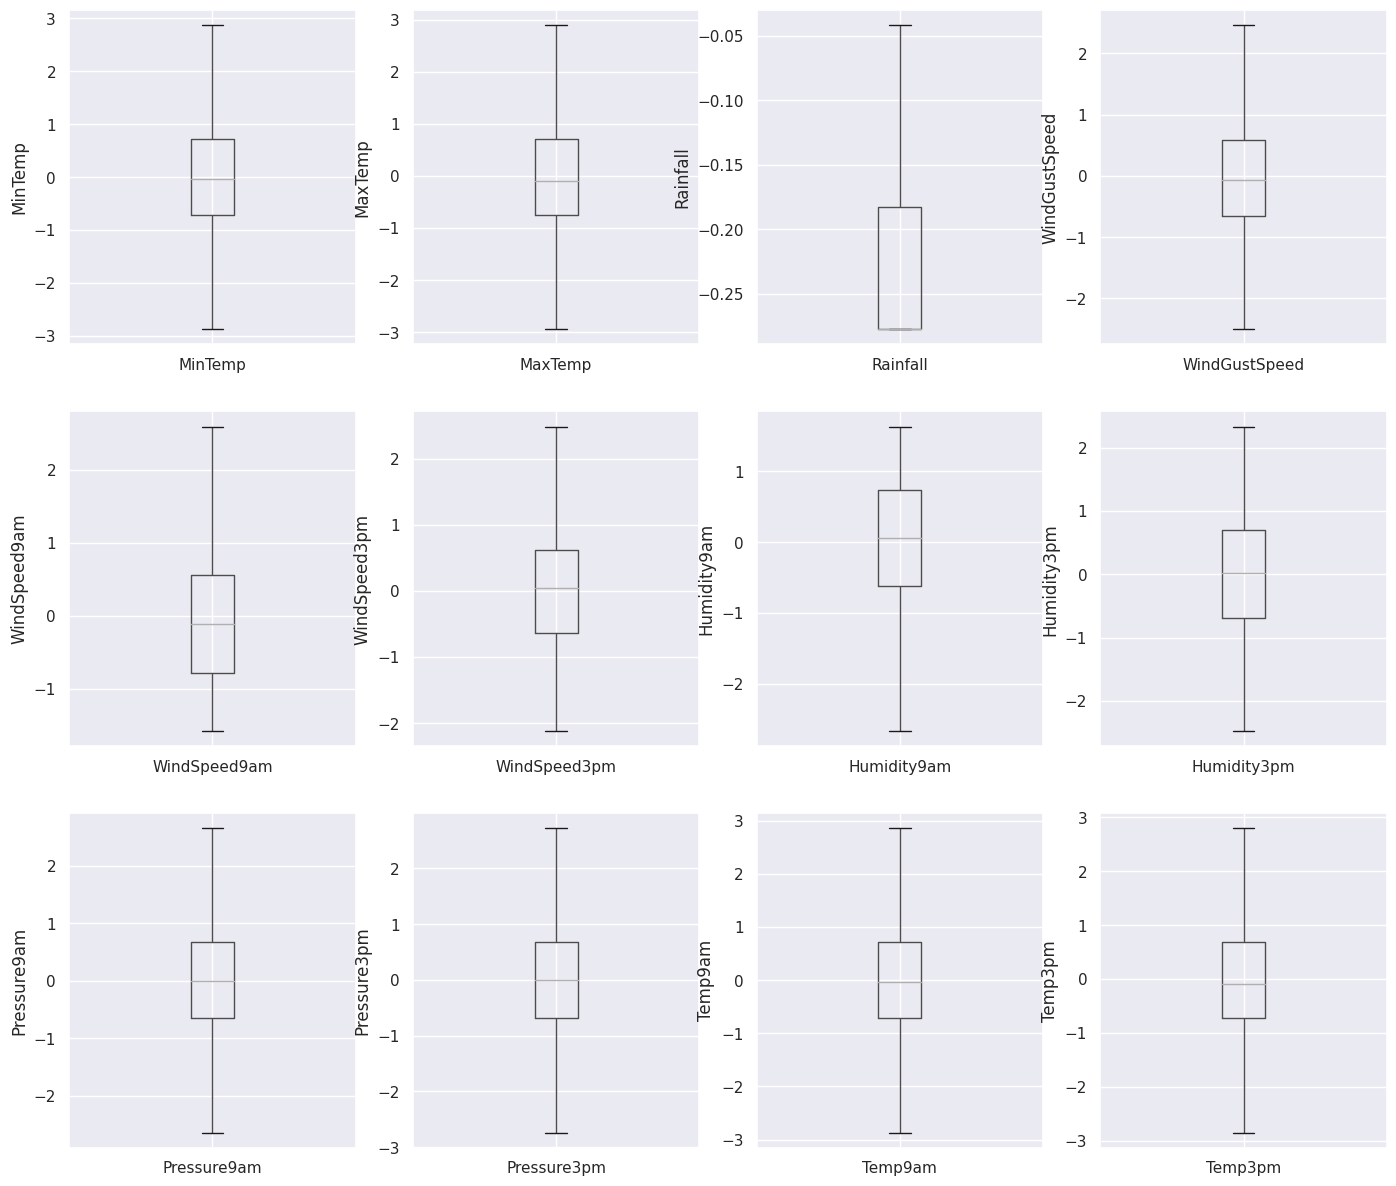

In [50]:
#Boxplot after Replacing the outliers with the max and min value from the numerical columns from the dataset
plt.figure(figsize=(17, 20))
for i in range(len(num_features)):
    plt.subplot(4, 4, i+1)
    fig = data1.boxplot(column=num_features[i])
    fig.set_title("")
    fig.set_ylabel(num_features[i])
plt.show()

In [51]:
print("Count of RainTomorrow values after removing the outliers")
print(Counter(data1['RainTomorrow']))

Count of RainTomorrow values after removing the outliers
Counter({'No': 109586, 'Yes': 31201})


In [52]:
#Import the KNNImputer Class
imputer=KNNImputer(n_neighbors=5)
imputer=imputer.fit(data1[num_features])
data1[num_features]=imputer.transform(data1[num_features])
data1

Location   MinTemp   MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0        Albury  0.189757 -0.047104 -0.206727           W       0.296762   
1        Albury -0.747179  0.262125 -0.277606         WNW       0.296762   
2        Albury  0.111679  0.346460 -0.277606         WSW       0.444058   
3        Albury -0.466098  0.669744 -0.277606          NE      -1.176193   
4        Albury  0.829996  1.274146 -0.159474           W       0.075819   
...         ...       ...       ...       ...         ...            ...   
145454    Uluru -1.356187 -0.201718 -0.277606           E      -0.660658   
145455    Uluru -1.465496  0.023175 -0.277606           E      -0.660658   
145456    Uluru -1.340571  0.290236 -0.277606         NNW      -1.323488   
145457    Uluru -1.059490  0.515130 -0.277606           N      -0.218772   
145458    Uluru -0.684716  0.529186 -0.277606          SE      -0.881602   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               W        WNW      0.676275      0.610232     0.113996   
1             NNW        WSW     -1.124274      0.382909    -1.302317   
2               W        WSW      0.563741      0.837555    -1.617054   
3              SE          E     -0.336533     -1.094689    -1.249861   
4             ENE         NW     -0.786671      0.155586     0.691012   
...           ...        ...           ...           ...          ...   
145454        ESE          E      0.113604     -0.640043    -0.515477   
145455         SE        ENE     -0.111465     -0.867366    -0.935125   
145456         SE          N     -0.111465     -1.094689    -0.672845   
145457         SE        WNW     -0.561602     -1.094689    -0.830213   
145458        SSE          N     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm RainToday  \
0         -1.415339    -1.401098    -1.159562 -0.013403  0.015397        No   
1         -1.271158    -0.992926    -1.060065  0.032779  0.375743        No   
2         -1.030857    -1.415173    -0.932140  0.617756  0.217191        No   
3         -1.703700    -0.007682    -0.349372  0.171326  0.692849        No   
4         -0.886677    -0.964776    -1.315914  0.125144  1.154093        No   
...             ...          ...          ...       ...       ...       ...   
145454    -1.175038     0.991637     0.844593 -1.167962 -0.114328        No   
145455    -1.319218     0.977562     0.716668 -1.060203  0.101880        No   
145456    -1.463399     0.822738     0.546102 -0.937050  0.404571        No   
145457    -1.319218     0.470865     0.219183 -0.690744  0.635193        No   
145458    -1.319218     0.245667     0.176542 -0.290497  0.620779        No   

       RainTomorrow  Year  Month  
0                No  2008     12  
1                No  2008     12  
2                No  2008     12  
3                No  2008     12  
4                No  2008     12  
...             ...   ...    ...  
145454           No  2017      6  
145455           No  2017      6  
145456           No  2017      6  
145457           No  2017      6  
145458           No  2017      6  

[140787 rows x 20 columns]

<Figure size 1000x600 with 0 Axes>

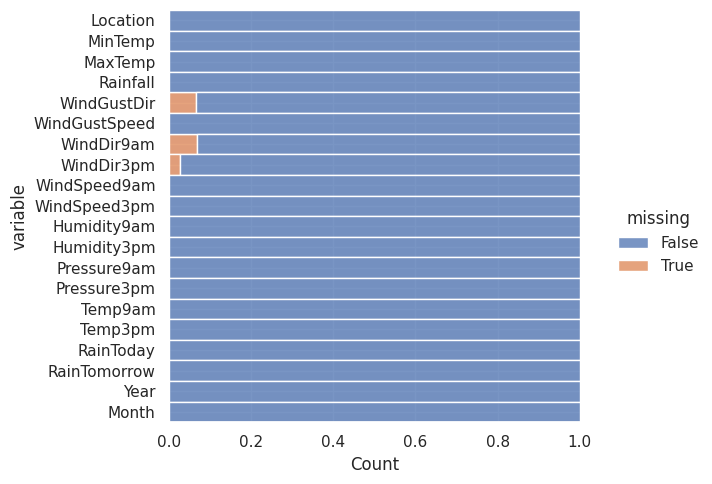

In [53]:
plt.figure(figsize=(10,6))
sns.displot( data=data1.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25 )

<Axes: >

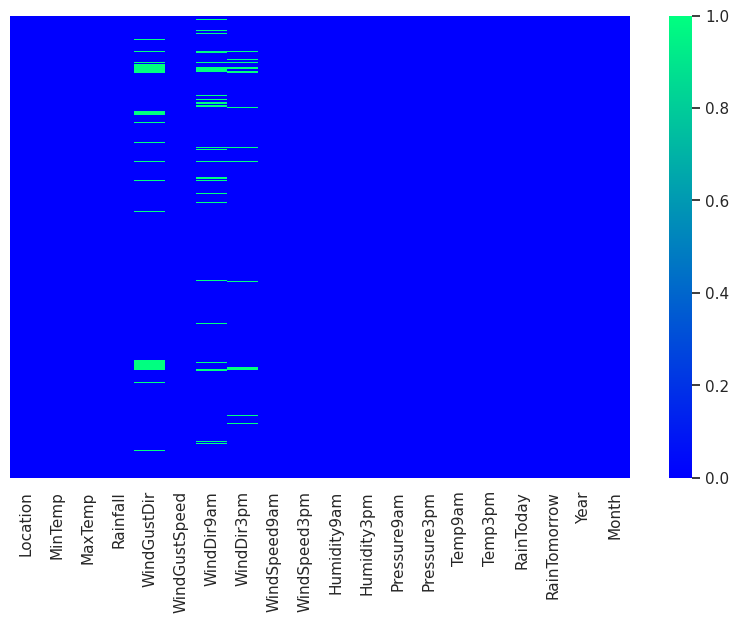

In [54]:
sns.heatmap(data1.isnull(),yticklabels=False,cmap='winter')

In [55]:
print(data1['WindGustDir'].mode())
print(data1['WindDir9am'].mode())
print(data1['WindDir3pm'].mode())

0    W
Name: WindGustDir, dtype: object
0    N
Name: WindDir9am, dtype: object
0    SE
Name: WindDir3pm, dtype: object


In [56]:
data1['WindGustDir'].fillna('W',inplace=True)
data1['WindDir9am'].fillna('N',inplace=True)
data1['WindDir3pm'].fillna('SE',inplace=True)

<Axes: >

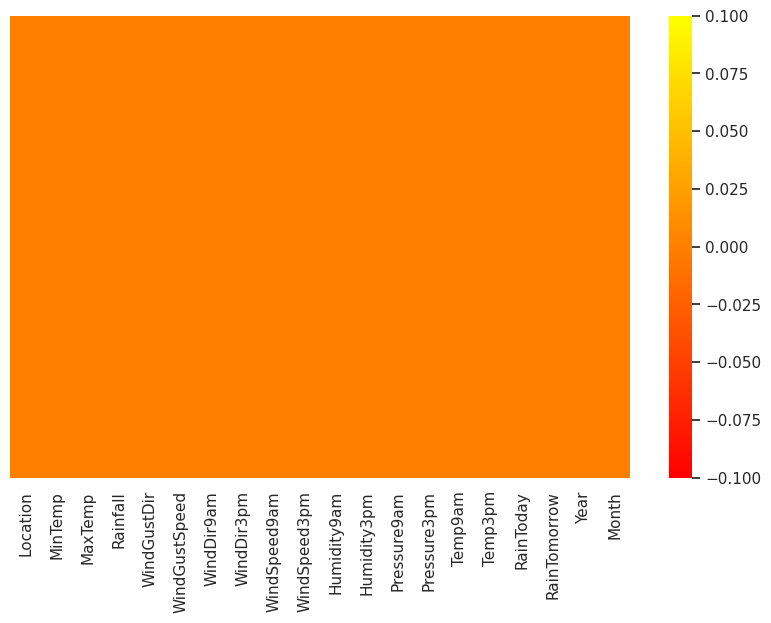

In [57]:
sns.heatmap(data1.isnull(),yticklabels=False,cmap='autumn')

In [58]:
def convert_categorical_features(feature):
    le = LabelEncoder()
    feature_encoded = le.fit_transform(feature)
    return(feature_encoded)

In [59]:
for feature in cat_features:
    data1[feature]=convert_categorical_features(data1[feature])
data1[cat_features]

Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
0              2           13          13          14          0             0
1              2           14           6          15          0             0
2              2           15          13          15          0             0
3              2            4           9           0          0             0
4              2           13           1           7          0             0
...          ...          ...         ...         ...        ...           ...
145454        41            0           2           0          0             0
145455        41            0           9           1          0             0
145456        41            6           9           3          0             0
145457        41            3           9          14          0             0
145458        41            9          10           3          0             0

[140787 rows x 6 columns]

In [60]:
data1.describe()

Location        MinTemp        MaxTemp       Rainfall  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean       23.720074      -0.000020       0.000218      -0.220227   
std        14.233401       0.998608       0.997175       0.093543   
min         0.000000      -2.870899      -2.942610      -0.277606   
25%        11.000000      -0.715947      -0.749897      -0.277606   
50%        24.000000      -0.028861      -0.089272      -0.277606   
75%        36.000000       0.720687       0.697856      -0.183101   
max        48.000000       2.875639       2.904625      -0.041343   

        WindGustDir  WindGustSpeed     WindDir9am     WindDir3pm  \
count  140787.00000  140787.000000  140787.000000  140787.000000   
mean        8.05362      -0.025568       7.006172       7.785740   
std         4.69313       0.940052       4.515248       4.547275   
min         0.00000      -2.501852       0.000000       0.000000   
25%         4.00000      -0.660658       3.000000       4.000000   
50%         9.00000      -0.100936       7.000000       8.000000   
75%        13.00000       0.561894      11.000000      12.000000   
max        15.00000       2.469370      15.000000      15.000000   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean       -0.012328      -0.017824       0.005030       0.000717   
std         0.964045       0.963686       0.989476       0.994030   
min        -1.574411      -2.117641      -2.666174      -2.472663   
25%        -0.786671      -0.640043      -0.620389      -0.694436   
50%        -0.111465      -0.185398       0.061540       0.026467   
75%         0.563741       0.610232       0.743468       0.651250   
max         2.589359       2.485644       1.635221       2.333357   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean        0.027476       0.030411      -0.002380       0.003726   
std         0.955491       0.960044       0.999574       0.993517   
min        -2.639691      -2.737301      -2.869011      -2.852965   
25%        -0.598828      -0.619435      -0.721532      -0.719711   
50%         0.048618       0.048617      -0.044191      -0.071087   
75%         0.667914       0.674027       0.694726       0.678435   
max         2.652477       2.720824       2.857599       2.797275   

           RainToday   RainTomorrow           Year          Month  
count  140787.000000  140787.000000  140787.000000  140787.000000  
mean        0.223423       0.221618    2012.757492       6.403482  
std         0.416541       0.415337       2.542272       3.426583  
min         0.000000       0.000000    2007.000000       1.000000  
25%         0.000000       0.000000    2011.000000       3.000000  
50%         0.000000       0.000000    2013.000000       6.000000  
75%         0.000000       0.000000    2015.000000       9.000000  
max         1.000000       1.000000    2017.000000      12.000000

In [61]:
#Creating a copy of preprocessed dataset
df1=data1.copy()

In [62]:
#creating a temporary dataframe for numerical features
temp_df = df1[num_features]
temp_df

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.189757 -0.047104 -0.206727       0.296762      0.676275   
1      -0.747179  0.262125 -0.277606       0.296762     -1.124274   
2       0.111679  0.346460 -0.277606       0.444058      0.563741   
3      -0.466098  0.669744 -0.277606      -1.176193     -0.336533   
4       0.829996  1.274146 -0.159474       0.075819     -0.786671   
...          ...       ...       ...            ...           ...   
145454 -1.356187 -0.201718 -0.277606      -0.660658      0.113604   
145455 -1.465496  0.023175 -0.277606      -0.660658     -0.111465   
145456 -1.340571  0.290236 -0.277606      -1.323488     -0.111465   
145457 -1.059490  0.515130 -0.277606      -0.218772     -0.561602   
145458 -0.684716  0.529186 -0.277606      -0.881602     -0.111465   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.610232     0.113996    -1.415339    -1.401098    -1.159562   
1           0.382909    -1.302317    -1.271158    -0.992926    -1.060065   
2           0.837555    -1.617054    -1.030857    -1.415173    -0.932140   
3          -1.094689    -1.249861    -1.703700    -0.007682    -0.349372   
4           0.155586     0.691012    -0.886677    -0.964776    -1.315914   
...              ...          ...          ...          ...          ...   
145454     -0.640043    -0.515477    -1.175038     0.991637     0.844593   
145455     -0.867366    -0.935125    -1.319218     0.977562     0.716668   
145456     -1.094689    -0.672845    -1.463399     0.822738     0.546102   
145457     -1.094689    -0.830213    -1.319218     0.470865     0.219183   
145458     -1.322011    -0.935125    -1.319218     0.245667     0.176542   

         Temp9am   Temp3pm  
0      -0.013403  0.015397  
1       0.032779  0.375743  
2       0.617756  0.217191  
3       0.171326  0.692849  
4       0.125144  1.154093  
...          ...       ...  
145454 -1.167962 -0.114328  
145455 -1.060203  0.101880  
145456 -0.937050  0.404571  
145457 -0.690744  0.635193  
145458 -0.290497  0.620779  

[140787 rows x 12 columns]

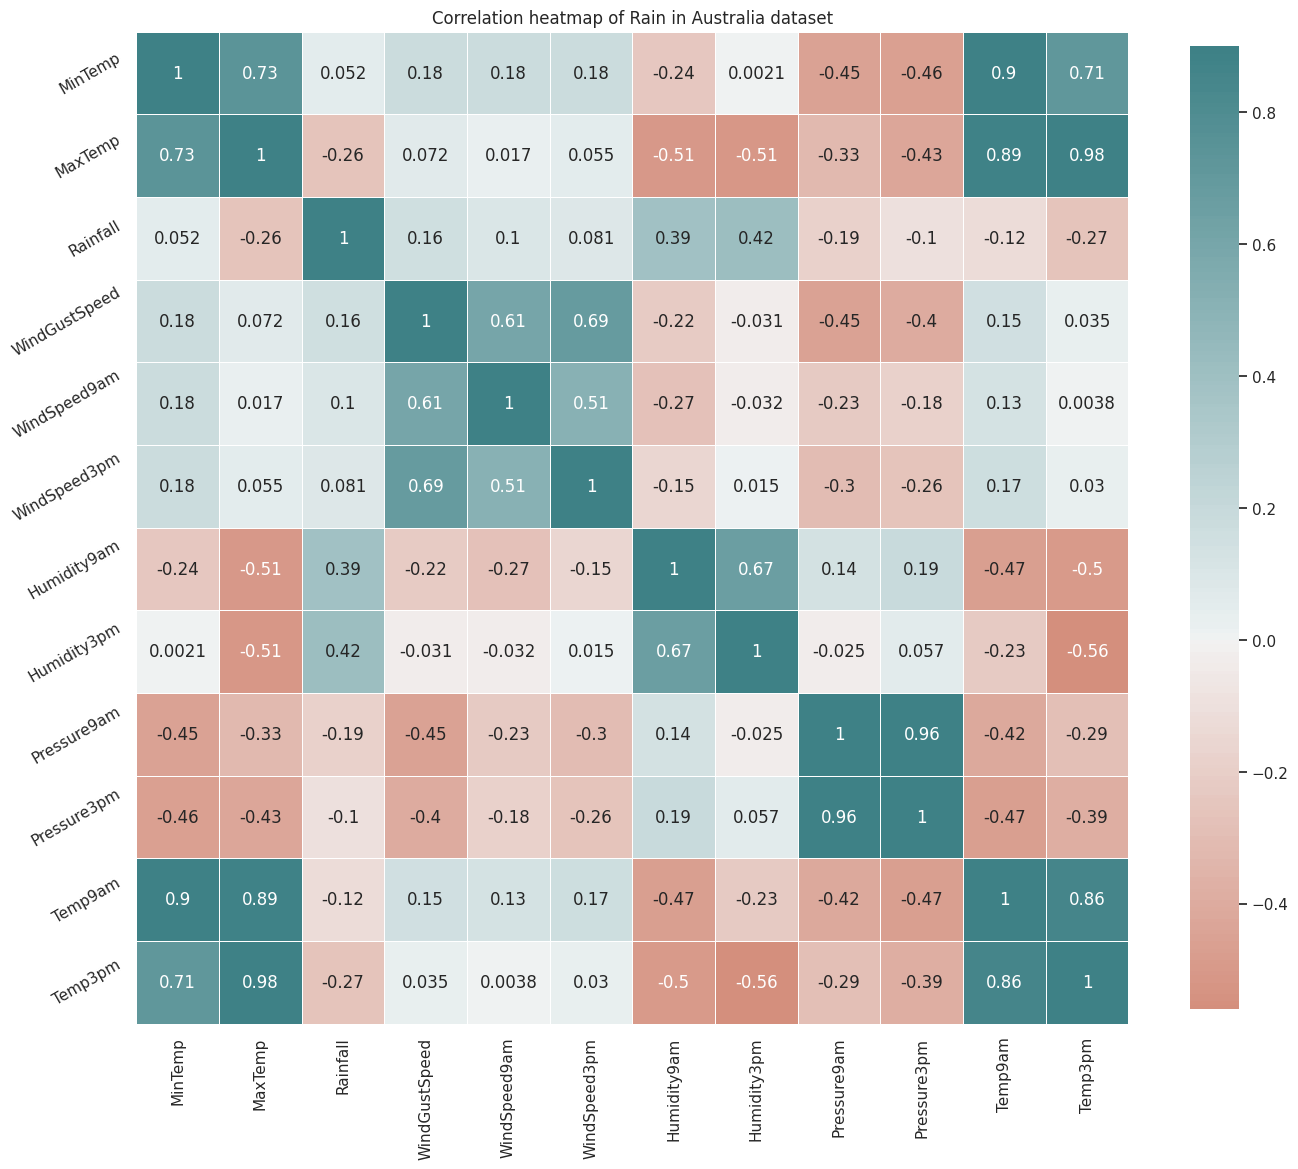

In [63]:
#correlation matrix
plt.figure(figsize=(16,25))
plt.title('Correlation heatmap of Rain in Australia dataset')
ax = sns.heatmap(temp_df.corr(),annot=True,vmax=0.9,center=0, square=True,linewidths=0.5,cbar_kws={'shrink':.5},cmap=sns.diverging_palette(20,200,n=200))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yticklabels(ax.get_yticklabels(),rotation=30)
plt.show()

In [64]:
for column1 in temp_df.columns:
    for column2 in range(temp_df.columns.get_loc(column1) + 1, len(temp_df.columns)):
        if temp_df[column1].corr(temp_df.iloc[:, column2]) >= 0.9:
            print(f"{column1} and {temp_df.columns[column2]} are highly correlated")


MinTemp and Temp9am are highly correlated
MaxTemp and Temp3pm are highly correlated
Pressure9am and Pressure3pm are highly correlated


In [65]:
morning_temp = (df1['MinTemp'] + df1['Temp9am']) / 2
noon_temp = (df1['MaxTemp'] + df1['Temp3pm']) / 2
new_pressure = (df1['Pressure9am'] + df1['Pressure3pm']) / 2

temp_df['Morning_temp'] = morning_temp
temp_df['Noon_temp'] = noon_temp
temp_df['New_pressure'] = new_pressure

temp_df.drop(["MinTemp", "Temp9am", "MaxTemp", "Temp3pm", "Pressure9am", "Pressure3pm"], inplace=True, axis=1)

temp_df.head()


<ipython-input-65-7144b0684939>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-7144b0684939>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-7144b0684939>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-7144b06

Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0 -0.206727       0.296762      0.676275      0.610232     0.113996   
1 -0.277606       0.296762     -1.124274      0.382909    -1.302317   
2 -0.277606       0.444058      0.563741      0.837555    -1.617054   
3 -0.277606      -1.176193     -0.336533     -1.094689    -1.249861   
4 -0.159474       0.075819     -0.786671      0.155586     0.691012   

   Humidity3pm  Morning_temp  Noon_temp  New_pressure  
0    -1.415339      0.088177  -0.015854     -1.280330  
1    -1.271158     -0.357200   0.318934     -1.026495  
2    -1.030857      0.364717   0.281825     -1.173657  
3    -1.703700     -0.147386   0.681297     -0.178527  
4    -0.886677      0.477570   1.214119     -1.140345

In [66]:
df1['Morning_temp'] = morning_temp
df1['Noon_temp'] = noon_temp
df1['New_pressure'] = new_pressure
df1.drop(["MinTemp","Temp9am","MaxTemp","Temp3pm","Pressure9am","Pressure3pm"], inplace=True, axis=1)
df1.head()


Location  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0         2 -0.206727           13       0.296762          13          14   
1         2 -0.277606           14       0.296762           6          15   
2         2 -0.277606           15       0.444058          13          15   
3         2 -0.277606            4      -1.176193           9           0   
4         2 -0.159474           13       0.075819           1           7   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  RainToday  \
0      0.676275      0.610232     0.113996    -1.415339          0   
1     -1.124274      0.382909    -1.302317    -1.271158          0   
2      0.563741      0.837555    -1.617054    -1.030857          0   
3     -0.336533     -1.094689    -1.249861    -1.703700          0   
4     -0.786671      0.155586     0.691012    -0.886677          0   

   RainTomorrow  Year  Month  Morning_temp  Noon_temp  New_pressure  
0             0  2008     12      0.088177  -0.015854     -1.280330  
1             0  2008     12     -0.357200   0.318934     -1.026495  
2             0  2008     12      0.364717   0.281825     -1.173657  
3             0  2008     12     -0.147386   0.681297     -0.178527  
4             0  2008     12      0.477570   1.214119     -1.140345

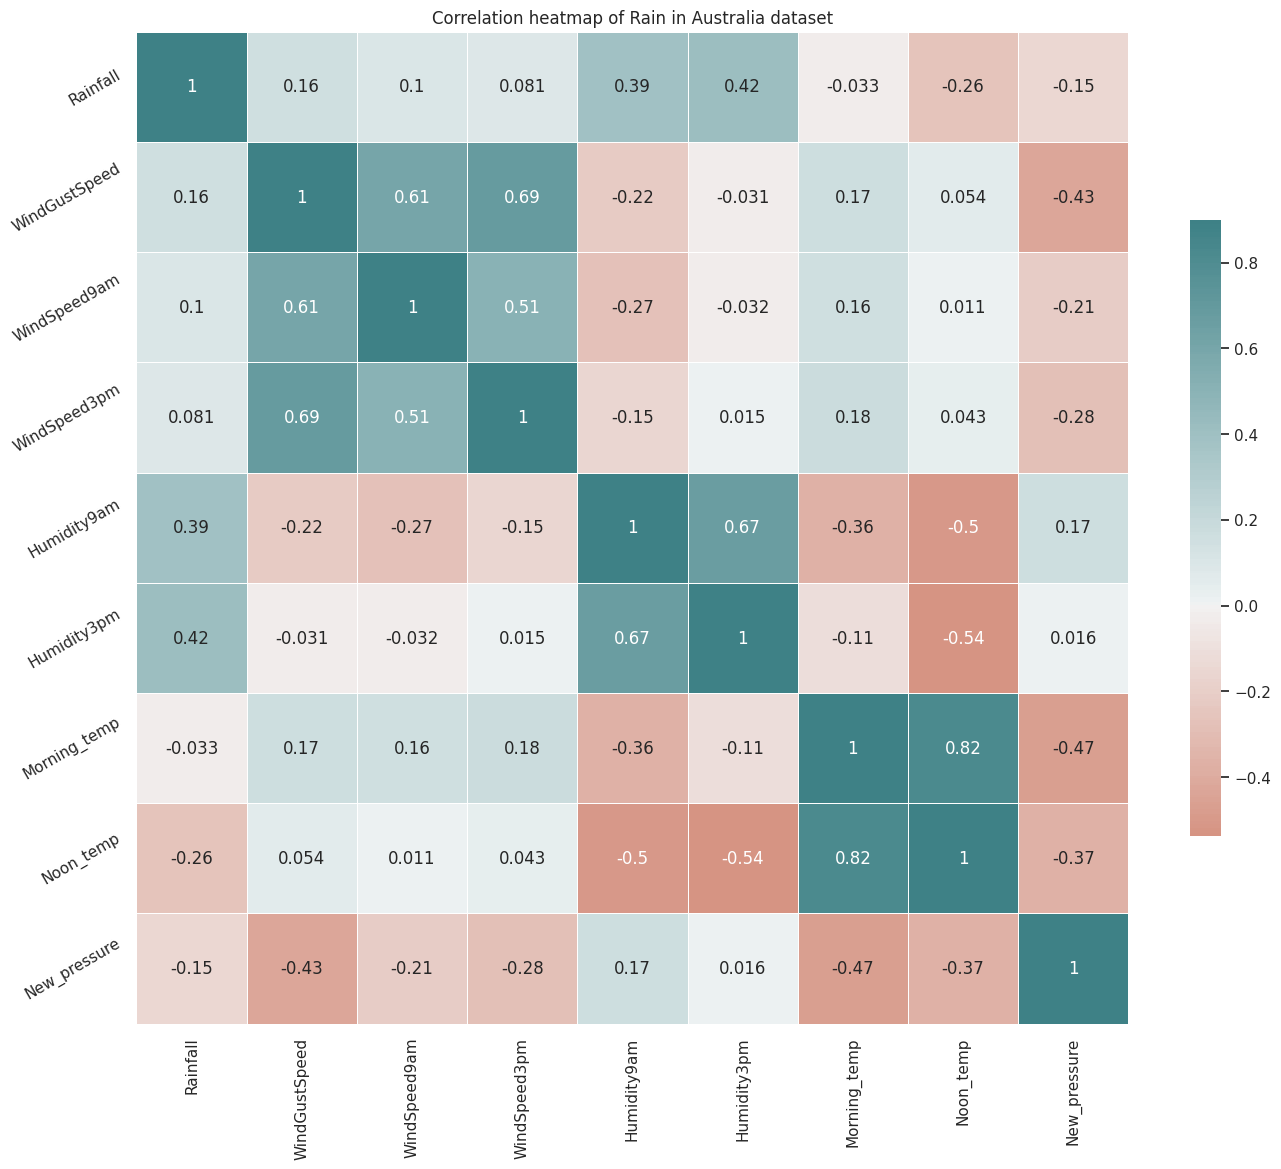

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,16))
plt.title('Correlation heatmap of Rain in Australia dataset')
ax = sns.heatmap(temp_df.corr(), annot=True, vmax=0.9, center=0, square=True, linewidths=0.5, cbar_kws={'shrink':0.5}, cmap=sns.diverging_palette(20,200,n=200))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()


In [68]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(Z3):
    vif_data = pd.DataFrame()
    vif_data["feature"] = Z3.columns
    vif_data["VIF"] = [variance_inflation_factor(np.array(Z3), i) for i in range(len(Z3.columns))]
    return vif_data


In [69]:
vif_df = vif(temp_df)
vif_df.sort_values(by=['VIF'],ascending=False)

feature       VIF
7      Noon_temp  9.594395
6   Morning_temp  7.771823
5    Humidity3pm  4.505118
1  WindGustSpeed  2.626201
4    Humidity9am  2.485252
3   WindSpeed3pm  1.976878
2   WindSpeed9am  1.807381
8   New_pressure  1.568601
0       Rainfall  1.054257

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]


In [71]:
calculate_vif_(temp_df,5)

dropping 'Noon_temp' at index: 7
Remaining variables:
Index(['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Morning_temp', 'New_pressure'],
      dtype='object')


Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0      -0.206727       0.296762      0.676275      0.610232     0.113996   
1      -0.277606       0.296762     -1.124274      0.382909    -1.302317   
2      -0.277606       0.444058      0.563741      0.837555    -1.617054   
3      -0.277606      -1.176193     -0.336533     -1.094689    -1.249861   
4      -0.159474       0.075819     -0.786671      0.155586     0.691012   
...          ...            ...           ...           ...          ...   
145454 -0.277606      -0.660658      0.113604     -0.640043    -0.515477   
145455 -0.277606      -0.660658     -0.111465     -0.867366    -0.935125   
145456 -0.277606      -1.323488     -0.111465     -1.094689    -0.672845   
145457 -0.277606      -0.218772     -0.561602     -1.094689    -0.830213   
145458 -0.277606      -0.881602     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Morning_temp  New_pressure  
0         -1.415339      0.088177     -1.280330  
1         -1.271158     -0.357200     -1.026495  
2         -1.030857      0.364717     -1.173657  
3         -1.703700     -0.147386     -0.178527  
4         -0.886677      0.477570     -1.140345  
...             ...           ...           ...  
145454    -1.175038     -1.262074      0.918115  
145455    -1.319218     -1.262849      0.847115  
145456    -1.463399     -1.138811      0.684420  
145457    -1.319218     -0.875117      0.345024  
145458    -1.319218     -0.487607      0.211104  

[140787 rows x 8 columns]

In [72]:
df1.drop(['Noon_temp'], axis=1, inplace=True)
temp_df.drop(['Noon_temp'], axis=1, inplace=True)
temp_df


<ipython-input-72-c5f812d55f1f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0      -0.206727       0.296762      0.676275      0.610232     0.113996   
1      -0.277606       0.296762     -1.124274      0.382909    -1.302317   
2      -0.277606       0.444058      0.563741      0.837555    -1.617054   
3      -0.277606      -1.176193     -0.336533     -1.094689    -1.249861   
4      -0.159474       0.075819     -0.786671      0.155586     0.691012   
...          ...            ...           ...           ...          ...   
145454 -0.277606      -0.660658      0.113604     -0.640043    -0.515477   
145455 -0.277606      -0.660658     -0.111465     -0.867366    -0.935125   
145456 -0.277606      -1.323488     -0.111465     -1.094689    -0.672845   
145457 -0.277606      -0.218772     -0.561602     -1.094689    -0.830213   
145458 -0.277606      -0.881602     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Morning_temp  New_pressure  
0         -1.415339      0.088177     -1.280330  
1         -1.271158     -0.357200     -1.026495  
2         -1.030857      0.364717     -1.173657  
3         -1.703700     -0.147386     -0.178527  
4         -0.886677      0.477570     -1.140345  
...             ...           ...           ...  
145454    -1.175038     -1.262074      0.918115  
145455    -1.319218     -1.262849      0.847115  
145456    -1.463399     -1.138811      0.684420  
145457    -1.319218     -0.875117      0.345024  
145458    -1.319218     -0.487607      0.211104  

[140787 rows x 8 columns]

In [73]:
data1

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0              2  0.189757 -0.047104 -0.206727           13       0.296762   
1              2 -0.747179  0.262125 -0.277606           14       0.296762   
2              2  0.111679  0.346460 -0.277606           15       0.444058   
3              2 -0.466098  0.669744 -0.277606            4      -1.176193   
4              2  0.829996  1.274146 -0.159474           13       0.075819   
...          ...       ...       ...       ...          ...            ...   
145454        41 -1.356187 -0.201718 -0.277606            0      -0.660658   
145455        41 -1.465496  0.023175 -0.277606            0      -0.660658   
145456        41 -1.340571  0.290236 -0.277606            6      -1.323488   
145457        41 -1.059490  0.515130 -0.277606            3      -0.218772   
145458        41 -0.684716  0.529186 -0.277606            9      -0.881602   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               13          14      0.676275      0.610232     0.113996   
1                6          15     -1.124274      0.382909    -1.302317   
2               13          15      0.563741      0.837555    -1.617054   
3                9           0     -0.336533     -1.094689    -1.249861   
4                1           7     -0.786671      0.155586     0.691012   
...            ...         ...           ...           ...          ...   
145454           2           0      0.113604     -0.640043    -0.515477   
145455           9           1     -0.111465     -0.867366    -0.935125   
145456           9           3     -0.111465     -1.094689    -0.672845   
145457           9          14     -0.561602     -1.094689    -0.830213   
145458          10           3     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  RainToday  \
0         -1.415339    -1.401098    -1.159562 -0.013403  0.015397          0   
1         -1.271158    -0.992926    -1.060065  0.032779  0.375743          0   
2         -1.030857    -1.415173    -0.932140  0.617756  0.217191          0   
3         -1.703700    -0.007682    -0.349372  0.171326  0.692849          0   
4         -0.886677    -0.964776    -1.315914  0.125144  1.154093          0   
...             ...          ...          ...       ...       ...        ...   
145454    -1.175038     0.991637     0.844593 -1.167962 -0.114328          0   
145455    -1.319218     0.977562     0.716668 -1.060203  0.101880          0   
145456    -1.463399     0.822738     0.546102 -0.937050  0.404571          0   
145457    -1.319218     0.470865     0.219183 -0.690744  0.635193          0   
145458    -1.319218     0.245667     0.176542 -0.290497  0.620779          0   

        RainTomorrow  Year  Month  
0                  0  2008     12  
1                  0  2008     12  
2                  0  2008     12  
3                  0  2008     12  
4                  0  2008     12  
...              ...   ...    ...  
145454             0  2017      6  
145455             0  2017      6  
145456             0  2017      6  
145457             0  2017      6  
145458             0  2017      6  

[140787 rows x 20 columns]

In [74]:
num_features = [column_name for column_name in df1.columns if df1[column_name].dtype=='float64']
data1['Morning_temp']=morning_temp
data1['New_pressure']=new_pressure
data1.drop(['MinTemp','Temp9am','MaxTemp','Temp3pm','Pressure9am','Pressure3pm'],inplace=True , axis=1)
data1[num_features].info()


<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Rainfall       140787 non-null  float64
 1   WindGustSpeed  140787 non-null  float64
 2   WindSpeed9am   140787 non-null  float64
 3   WindSpeed3pm   140787 non-null  float64
 4   Humidity9am    140787 non-null  float64
 5   Humidity3pm    140787 non-null  float64
 6   Morning_temp   140787 non-null  float64
 7   New_pressure   140787 non-null  float64
dtypes: float64(8)
memory usage: 9.7 MB


In [75]:
#best variable selected using Stepwise Feature Selection
best_var = ['Location','Rainfall','WindGustSpeed','WindDir9am','WindSpeed9am','WindSpeed3pm','Humidity9am', 'Humidity3pm','RainToday','Year','Month','Morning_temp','New_pressure']

In [76]:
#Splitting dataset into X(explanatory) and Y(target variable)
X = data1[best_var]
y=data1['RainTomorrow']

In [77]:
# Split X and y into trainning testing sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [78]:
X_train.shape , X_test.shape

((112629, 13), (28158, 13))

In [79]:
from imblearn.over_sampling import SMOTE


In [80]:
oversample= SMOTE()
X_train_smote , y_train_smote = oversample.fit_resample(X_train,y_train)

In [81]:
from xgboost import XGBClassifier

In [82]:
xgb_model=XGBClassifier()

In [83]:
xgb_model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
y_pred_xgb=xgb_model.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
print(accuracy_score(y_test,y_pred_xgb))

0.84828467930961


In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
RF_model=RandomForestClassifier()

In [89]:
RF_model.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [90]:
y_pred_RF=RF_model.predict(X_test)

In [91]:
print(accuracy_score(y_test,y_pred_RF))

0.8394417217131899


In [92]:
# Make predictions on both training and test sets
y_pred_train = RF_model.predict(X_train_smote)
y_pred_test = RF_model.predict(X_test)

# Calculate accuracy for both training and test sets
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


In [93]:
plt.bar(['Training', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'red'])
plt.title('Model Performance Comparison')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [94]:
from sklearn.metrics import confusion_matrix

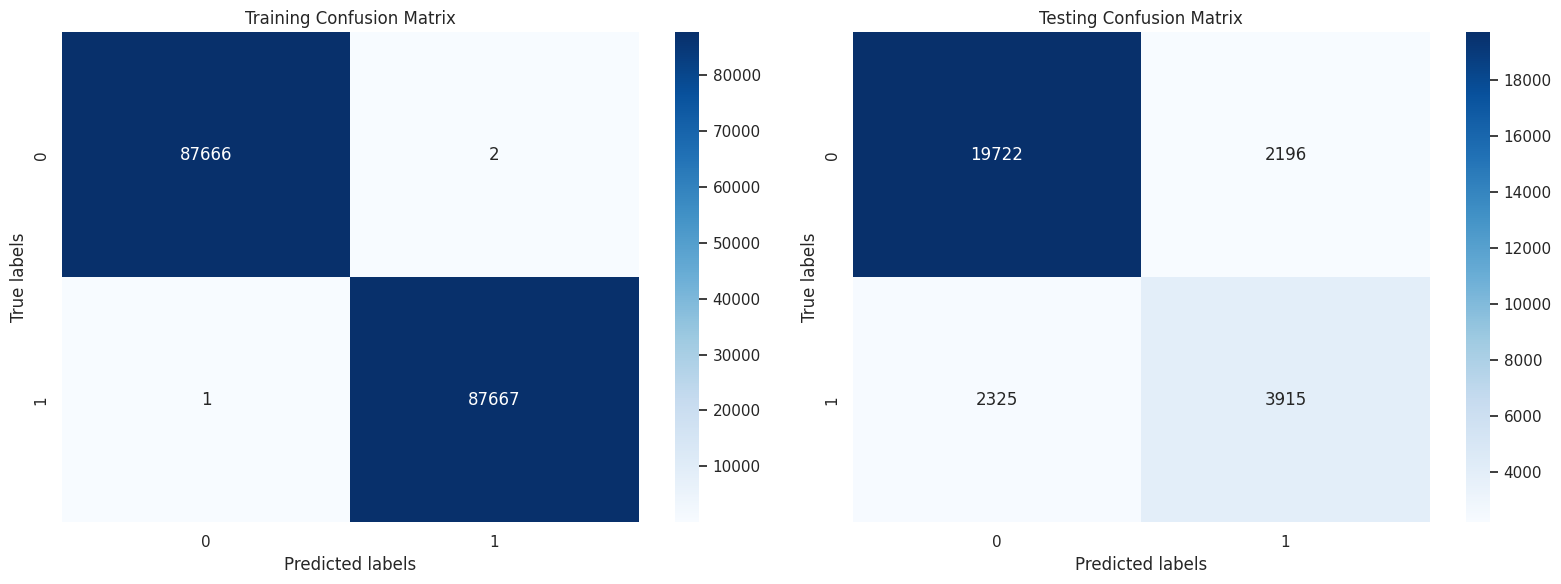

In [95]:
conf_matrix_train = confusion_matrix(y_train_smote, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrices
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='d', xticklabels=RF_model.classes_, yticklabels=RF_model.classes_)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='d', xticklabels=RF_model.classes_, yticklabels=RF_model.classes_)
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.tight_layout()
plt.show()

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
GB_model=GradientBoostingClassifier()

In [98]:
GB_model.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier()

In [99]:
y_pred_GB=GB_model.predict(X_test)

In [100]:
print(accuracy_score(y_pred_RF,y_pred_GB))

0.927445131046239


In [101]:
X_reset_index = X_train_smote.reset_index(drop=True)
y_reset_index = y_train_smote.reset_index(drop=True)

df_concatenated = pd.concat([X_reset_index, y_reset_index], axis=1)


In [102]:
# random_10_rows = df_concatenated.sample(n=50)
# random_10_rows

In [103]:
correct_mapping = all(df_concatenated.index == y_reset_index.index)

if correct_mapping:
    print("Every row of X is correctly mapped with the corresponding y.")
else:
    print("There is a mismatch between X and y.")

Every row of X is correctly mapped with the corresponding y.


In [104]:
df_concatenated.shape

(175336, 14)

In [105]:
sampled_dataframes = []
num_samples = int(0.8 * len(df_concatenated))
num_dataframes = 5

for i in range(num_dataframes):
    sampled_df = df_concatenated.sample(n=num_samples, replace=True, random_state=i)
    sampled_dataframes.append(sampled_df)

In [106]:
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier()
classifiers = []

for i in range(5):
    X = sampled_dataframes[i].drop(columns=['RainTomorrow'])
    y = sampled_dataframes[i]['RainTomorrow']

    classifier = DecisionTreeClassifier()
    classifier.fit(X, y)

    classifiers.append(classifier)


In [107]:
def aggregate_predictions(classifiers, test_data):
    all_predictions = []

    for classifier in classifiers:
        predictions = classifier.predict(test_data)
        all_predictions.append(predictions)

    ensemble_predictions = []

    for i in range(len(test_data)):
        sample_predictions = [pred[i] for pred in all_predictions]
        majority_vote = max(set(sample_predictions), key=sample_predictions.count)
        ensemble_predictions.append(majority_vote)

    return ensemble_predictions


In [108]:
# predictions = aggregate_predictions(classifiers, X_test)

In [109]:
# pd.DataFrame(predictions).shape

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = aggregate_predictions(classifiers, X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)



Accuracy: 0.8047091412742382
Confusion Matrix:
[[18971  2947]
 [ 2552  3688]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     21918
           1       0.56      0.59      0.57      6240

    accuracy                           0.80     28158
   macro avg       0.72      0.73      0.72     28158
weighted avg       0.81      0.80      0.81     28158



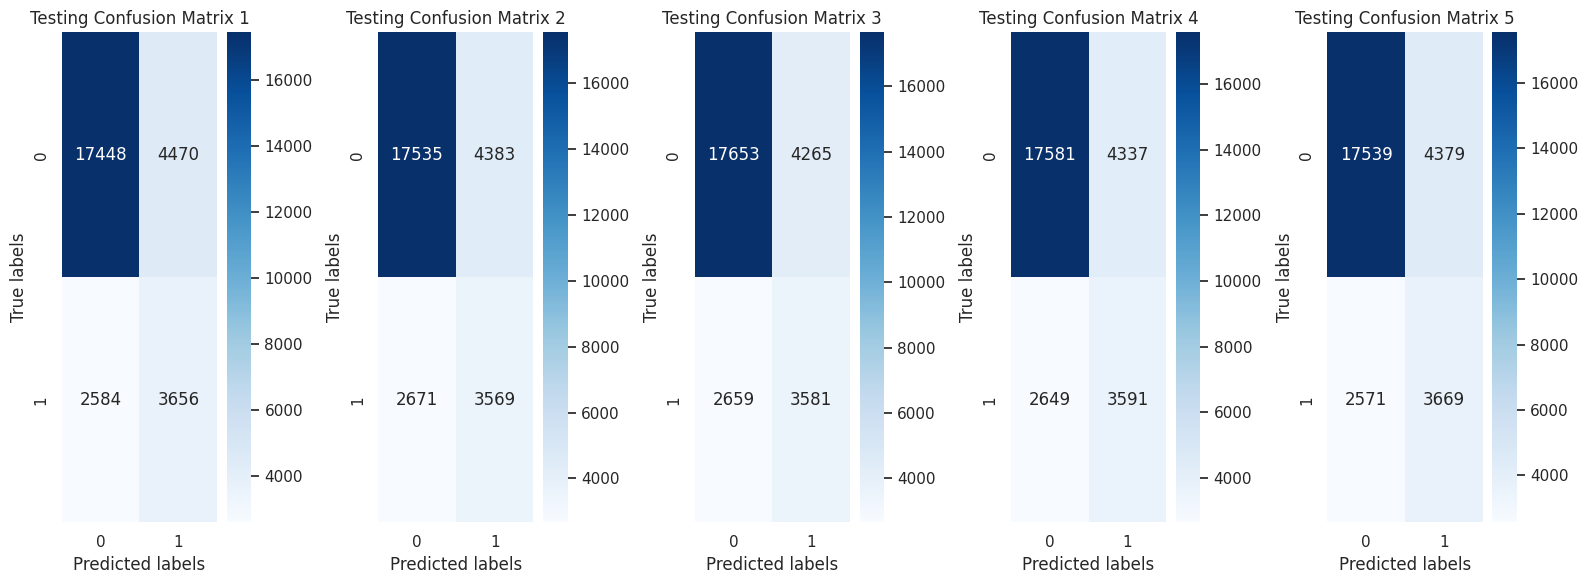

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

def evaluate_ensemble(classifiers, sampled_dataframes, X_test, y_test):
    train_accuracies = []
    test_accuracies = []
    test_conf_matrices = []

    for i, clf in enumerate(classifiers):
        X_train_sampled = sampled_dataframes[i].drop(columns=['RainTomorrow'])
        y_train_sampled = sampled_dataframes[i]['RainTomorrow']

        train_pred = clf.predict(X_train_sampled)
        test_pred = clf.predict(X_test)

        train_accuracy = accuracy_score(y_train_sampled, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        test_conf_matrix = confusion_matrix(y_test, test_pred)
        test_conf_matrices.append(test_conf_matrix)

    return train_accuracies, test_accuracies, test_conf_matrices

# Evaluate the ensemble model
train_accuracies, test_accuracies, test_conf_matrices = evaluate_ensemble(classifiers, sampled_dataframes, X_test, y_test)

# Plotting the comparison graph for accuracies
plt.plot(range(1, num_dataframes + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_dataframes + 1), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Ensemble Model')
plt.ylabel('Accuracy')
plt.title('Ensemble Model Performance')
plt.xticks(range(1, num_dataframes + 1))
plt.legend()
plt.show()

# Plotting confusion matrices for testing dataset
plt.figure(figsize=(16, 6))

for i in range(num_dataframes):
    plt.subplot(1, num_dataframes, i + 1)
    sns.heatmap(test_conf_matrices[i], annot=True, cmap='Blues', fmt='d', xticklabels=RF_model.classes_, yticklabels=RF_model.classes_)
    plt.title(f'Testing Confusion Matrix {i+1}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

plt.tight_layout()
plt.show()


In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracy for RF_model
RF_train_accuracy = accuracy_score(y_train, RF_model.predict(X_train))
RF_test_accuracy = accuracy_score(y_test, RF_model.predict(X_test))

# Calculate accuracy for the custom ensemble model
ensemble_train_accuracy = np.mean(train_accuracies)
ensemble_test_accuracy = np.mean(test_accuracies)

# Plotting the comparison graph for accuracies
labels = ['Random Forest', 'Custom Ensemble']
train_accuracies = [RF_train_accuracy, ensemble_train_accuracy]
test_accuracies = [RF_test_accuracy, ensemble_test_accuracy]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [113]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for RF_model
RF_train_accuracy = accuracy_score(y_train, RF_model.predict(X_train))
RF_test_accuracy = accuracy_score(y_test, RF_model.predict(X_test))

# Calculate accuracy for the custom ensemble model
ensemble_train_accuracy = np.mean(train_accuracies)
ensemble_test_accuracy = np.mean(test_accuracies)

# Print out the accuracy scores
print("Random Forest Model:")
print("Training Accuracy:", RF_train_accuracy)
print("Testing Accuracy:", RF_test_accuracy)

print("\nCustom Ensemble Model:")
print("Training Accuracy:", ensemble_train_accuracy)
print("Testing Accuracy:", ensemble_test_accuracy)


Random Forest Model:
Training Accuracy: 0.9999733638760887
Testing Accuracy: 0.8394417217131899

Custom Ensemble Model:
Training Accuracy: 0.9999866819380443
Testing Accuracy: 0.7955359045386747


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_accuracy = 0
best_num_dataframes = 0
best_classifiers = []

# Define the range of values for num_dataframes to search over
num_dataframes_values = [3, 4, 5, 6, 7,9,10,12,14,15,16,17,18,19,20]

for num_dataframes in num_dataframes_values:
    sampled_dataframes = []
    num_samples = int(0.8 * len(df_concatenated))

    for i in range(num_dataframes):
        sampled_df = df_concatenated.sample(n=num_samples, replace=True, random_state=i)
        sampled_dataframes.append(sampled_df)

    classifiers = []

    for i in range(num_dataframes):
        X = sampled_dataframes[i].drop(columns=['RainTomorrow'])
        y = sampled_dataframes[i]['RainTomorrow']

        classifier = DecisionTreeClassifier()
        classifier.fit(X, y)

        classifiers.append(classifier)

    predictions = aggregate_predictions(classifiers, X_test)
    accuracy = accuracy_score(y_test, predictions)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_dataframes = num_dataframes
        best_classifiers = classifiers

print("Best number of dataframes:", best_num_dataframes)
print("Best accuracy:", best_accuracy)

# Now you can use the best classifiers and the best number of dataframes for further analysis


Best number of dataframes: 18
Best accuracy: 0.8309539029760636


In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_accuracy = 0
best_num_dataframes = 0
best_classifiers = []

# Define the range of values for num_dataframes to search over
num_dataframes_values = [21,22,23,24]

for num_dataframes in num_dataframes_values:
    sampled_dataframes = []
    num_samples = int(0.8 * len(df_concatenated))

    for i in range(num_dataframes):
        sampled_df = df_concatenated.sample(n=num_samples, replace=True, random_state=i)
        sampled_dataframes.append(sampled_df)

    classifiers = []

    for i in range(num_dataframes):
        X = sampled_dataframes[i].drop(columns=['RainTomorrow'])
        y = sampled_dataframes[i]['RainTomorrow']

        classifier = DecisionTreeClassifier()
        classifier.fit(X, y)

        classifiers.append(classifier)

    predictions = aggregate_predictions(classifiers, X_test)
    accuracy = accuracy_score(y_test, predictions)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_dataframes = num_dataframes
        best_classifiers = classifiers

print("Best number of dataframes:", best_num_dataframes)
print("Best accuracy:", best_accuracy)

# Now you can use the best classifiers and the best number of dataframes for further analysis


Best number of dataframes: 24
Best accuracy: 0.8336174444207686


In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_accuracy = 0
best_num_dataframes = 0
best_classifiers = []

# Define the range of values for num_dataframes to search over
num_dataframes_values = [100]

for num_dataframes in num_dataframes_values:
    sampled_dataframes = []
    num_samples = int(0.8 * len(df_concatenated))

    for i in range(num_dataframes):
        sampled_df = df_concatenated.sample(n=num_samples, replace=True, random_state=i)
        sampled_dataframes.append(sampled_df)

    classifiers = []

    for i in range(num_dataframes):
        X = sampled_dataframes[i].drop(columns=['RainTomorrow'])
        y = sampled_dataframes[i]['RainTomorrow']

        classifier = DecisionTreeClassifier()
        classifier.fit(X, y)

        classifiers.append(classifier)

    predictions = aggregate_predictions(classifiers, X_test)
    accuracy = accuracy_score(y_test, predictions)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_dataframes = num_dataframes
        best_classifiers = classifiers

print("Best number of dataframes:", best_num_dataframes)
print("Best accuracy:", best_accuracy)

# Now you can use the best classifiers and the best number of dataframes for further analysis


Best number of dataframes: 100
Best accuracy: 0.8362809858654734


In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_accuracy = 0
best_num_dataframes = 0
best_classifiers = []

# Define the range of values for num_dataframes to search over
num_dataframes_values = [110]

for num_dataframes in num_dataframes_values:
    sampled_dataframes = []
    num_samples = int(0.8 * len(df_concatenated))

    for i in range(num_dataframes):
        sampled_df = df_concatenated.sample(n=num_samples, replace=True, random_state=i)
        sampled_dataframes.append(sampled_df)

    classifiers = []

    for i in range(num_dataframes):
        X = sampled_dataframes[i].drop(columns=['RainTomorrow'])
        y = sampled_dataframes[i]['RainTomorrow']

        classifier = DecisionTreeClassifier()
        classifier.fit(X, y)

        classifiers.append(classifier)

    predictions = aggregate_predictions(classifiers, X_test)
    accuracy = accuracy_score(y_test, predictions)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_dataframes = num_dataframes
        best_classifiers = classifiers

print("Best number of dataframes:", best_num_dataframes)
print("Best accuracy:", best_accuracy)

# Now you can use the best classifiers and the best number of dataframes for further analysis


Best number of dataframes: 110
Best accuracy: 0.8359258470061794


In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_accuracy = 0
best_num_dataframes = 0
best_classifiers = []

# Define the range of values for num_dataframes to search over
num_dataframes_values = [115]

for num_dataframes in num_dataframes_values:
    sampled_dataframes = []
    num_samples = int(0.8 * len(df_concatenated))

    for i in range(num_dataframes):
        sampled_df = df_concatenated.sample(n=num_samples, replace=True, random_state=i)
        sampled_dataframes.append(sampled_df)

    classifiers = []

    for i in range(num_dataframes):
        X = sampled_dataframes[i].drop(columns=['RainTomorrow'])
        y = sampled_dataframes[i]['RainTomorrow']

        classifier = DecisionTreeClassifier()
        classifier.fit(X, y)

        classifiers.append(classifier)

    predictions = aggregate_predictions(classifiers, X_test)
    accuracy = accuracy_score(y_test, predictions)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_dataframes = num_dataframes
        best_classifiers = classifiers

print("Best number of dataframes:", best_num_dataframes)
print("Best accuracy:", best_accuracy)

# Now you can use the best classifiers and the best number of dataframes for further analysis


Best number of dataframes: 115
Best accuracy: 0.8366361247247673


In [119]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

sns.set()

In [120]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(175336, 13)
(175336,)


In [121]:
x = X_train_smote.iloc[:, 0]
y = X_train_smote.iloc[:, 1]

plt.figure(figsize=(7, 5))
plt.scatter(x[y_train_smote.values==0], y[y_train_smote.values==0], c='orange', edgecolors='w', s=100, label='class 0')
plt.scatter(x[y_train_smote.values==1], y[y_train_smote.values==1], c='crimson', edgecolors='w', s=100, label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(fontsize=14)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



In [122]:
df2=df_concatenated.copy()

In [123]:
print(Counter(df2['RainTomorrow']))

Counter({0: 87668, 1: 87668})


In [124]:
num_samples = int(0.95 * len(df2))

In [125]:
subset = df2.sample(n=num_samples, replace=True, random_state=42)

In [126]:
print(Counter(subset['RainTomorrow']))

Counter({0: 83351, 1: 83218})


In [127]:
num_1 = (subset['RainTomorrow'] == 1).sum()
num_0 = (subset['RainTomorrow'] == 0).sum()

In [128]:
subset['pre1(log-odds)'] = np.log(num_1/num_0)
subset

Location  Rainfall  WindGustSpeed  WindDir9am  WindSpeed9am  \
121958        43 -0.061919      -0.205717           6      0.387676   
146867        13 -0.277606      -0.293182           3      0.338672   
131932        32 -0.041343       0.885944           6     -0.274760   
103694        13 -0.277606      -0.071477           5      1.126413   
119879        28 -0.242467      -0.092956           0     -0.336533   
...          ...       ...            ...         ...           ...   
60331         38 -0.041343       1.033239          11      2.139221   
161685        43 -0.256766       0.201231           6     -0.309993   
152254        30 -0.042662      -1.025698           8      0.110811   
89315         48 -0.277606       1.180535           5      2.139221   
86302         48 -0.277606      -0.366068           9      0.563741   

        WindSpeed3pm  Humidity9am  Humidity3pm  RainToday  Year  Month  \
121958      0.041925     1.552309     1.331840          0  2014      5   
146867      0.230576     0.749779     0.266271          0  2009      1   
131932      0.351713     1.415798     0.638672          1  2011      6   
103694      0.155586    -0.515477    -0.838616          0  2016     10   
119879     -0.369571    -0.719959    -0.639035          0  2017      4   
...              ...          ...          ...        ...   ...    ...   
60331       1.633184     0.271364     1.516334          1  2017      1   
161685      0.342700     0.564573     0.640140          0  2009      8   
152254     -0.641454     0.904742     2.235149          0  2012      1   
89315       1.860507    -2.141614    -1.463399          0  2016     10   
86302       0.382909    -0.515477    -0.790556          0  2016      8   

        Morning_temp  New_pressure  RainTomorrow  pre1(log-odds)  
121958     -0.029449     -0.543593             1       -0.001597  
146867      1.987858     -1.273065             1       -0.001597  
131932     -0.119697      0.108328             1       -0.001597  
103694      2.017701     -1.040640             0       -0.001597  
119879      0.349630      0.640592             1       -0.001597  
...              ...           ...           ...             ...  
60331       0.794368      0.289906             1       -0.001597  
161685     -0.827083      0.734246             1       -0.001597  
152254      0.624045     -0.218050             1       -0.001597  
89315       0.595850     -0.942949             0       -0.001597  
86302      -0.687841      0.247264             0       -0.001597  

[166569 rows x 15 columns]

In [129]:
subset['pre1(probability)'] = 1/(1+np.exp(-np.log(num_1/num_0)))
subset

Location  Rainfall  WindGustSpeed  WindDir9am  WindSpeed9am  \
121958        43 -0.061919      -0.205717           6      0.387676   
146867        13 -0.277606      -0.293182           3      0.338672   
131932        32 -0.041343       0.885944           6     -0.274760   
103694        13 -0.277606      -0.071477           5      1.126413   
119879        28 -0.242467      -0.092956           0     -0.336533   
...          ...       ...            ...         ...           ...   
60331         38 -0.041343       1.033239          11      2.139221   
161685        43 -0.256766       0.201231           6     -0.309993   
152254        30 -0.042662      -1.025698           8      0.110811   
89315         48 -0.277606       1.180535           5      2.139221   
86302         48 -0.277606      -0.366068           9      0.563741   

        WindSpeed3pm  Humidity9am  Humidity3pm  RainToday  Year  Month  \
121958      0.041925     1.552309     1.331840          0  2014      5   
146867      0.230576     0.749779     0.266271          0  2009      1   
131932      0.351713     1.415798     0.638672          1  2011      6   
103694      0.155586    -0.515477    -0.838616          0  2016     10   
119879     -0.369571    -0.719959    -0.639035          0  2017      4   
...              ...          ...          ...        ...   ...    ...   
60331       1.633184     0.271364     1.516334          1  2017      1   
161685      0.342700     0.564573     0.640140          0  2009      8   
152254     -0.641454     0.904742     2.235149          0  2012      1   
89315       1.860507    -2.141614    -1.463399          0  2016     10   
86302       0.382909    -0.515477    -0.790556          0  2016      8   

        Morning_temp  New_pressure  RainTomorrow  pre1(log-odds)  \
121958     -0.029449     -0.543593             1       -0.001597   
146867      1.987858     -1.273065             1       -0.001597   
131932     -0.119697      0.108328             1       -0.001597   
103694      2.017701     -1.040640             0       -0.001597   
119879      0.349630      0.640592             1       -0.001597   
...              ...           ...           ...             ...   
60331       0.794368      0.289906             1       -0.001597   
161685     -0.827083      0.734246             1       -0.001597   
152254      0.624045     -0.218050             1       -0.001597   
89315       0.595850     -0.942949             0       -0.001597   
86302      -0.687841      0.247264             0       -0.001597   

        pre1(probability)  
121958           0.499601  
146867           0.499601  
131932           0.499601  
103694           0.499601  
119879           0.499601  
...                   ...  
60331            0.499601  
161685           0.499601  
152254           0.499601  
89315            0.499601  
86302            0.499601  

[166569 rows x 16 columns]

In [130]:
subset['res1'] = subset['RainTomorrow'] - subset['pre1(probability)']
subset

Location  Rainfall  WindGustSpeed  WindDir9am  WindSpeed9am  \
121958        43 -0.061919      -0.205717           6      0.387676   
146867        13 -0.277606      -0.293182           3      0.338672   
131932        32 -0.041343       0.885944           6     -0.274760   
103694        13 -0.277606      -0.071477           5      1.126413   
119879        28 -0.242467      -0.092956           0     -0.336533   
...          ...       ...            ...         ...           ...   
60331         38 -0.041343       1.033239          11      2.139221   
161685        43 -0.256766       0.201231           6     -0.309993   
152254        30 -0.042662      -1.025698           8      0.110811   
89315         48 -0.277606       1.180535           5      2.139221   
86302         48 -0.277606      -0.366068           9      0.563741   

        WindSpeed3pm  Humidity9am  Humidity3pm  RainToday  Year  Month  \
121958      0.041925     1.552309     1.331840          0  2014      5   
146867      0.230576     0.749779     0.266271          0  2009      1   
131932      0.351713     1.415798     0.638672          1  2011      6   
103694      0.155586    -0.515477    -0.838616          0  2016     10   
119879     -0.369571    -0.719959    -0.639035          0  2017      4   
...              ...          ...          ...        ...   ...    ...   
60331       1.633184     0.271364     1.516334          1  2017      1   
161685      0.342700     0.564573     0.640140          0  2009      8   
152254     -0.641454     0.904742     2.235149          0  2012      1   
89315       1.860507    -2.141614    -1.463399          0  2016     10   
86302       0.382909    -0.515477    -0.790556          0  2016      8   

        Morning_temp  New_pressure  RainTomorrow  pre1(log-odds)  \
121958     -0.029449     -0.543593             1       -0.001597   
146867      1.987858     -1.273065             1       -0.001597   
131932     -0.119697      0.108328             1       -0.001597   
103694      2.017701     -1.040640             0       -0.001597   
119879      0.349630      0.640592             1       -0.001597   
...              ...           ...           ...             ...   
60331       0.794368      0.289906             1       -0.001597   
161685     -0.827083      0.734246             1       -0.001597   
152254      0.624045     -0.218050             1       -0.001597   
89315       0.595850     -0.942949             0       -0.001597   
86302      -0.687841      0.247264             0       -0.001597   

        pre1(probability)      res1  
121958           0.499601  0.500399  
146867           0.499601  0.500399  
131932           0.499601  0.500399  
103694           0.499601 -0.499601  
119879           0.499601  0.500399  
...                   ...       ...  
60331            0.499601  0.500399  
161685           0.499601  0.500399  
152254           0.499601  0.500399  
89315            0.499601 -0.499601  
86302            0.499601 -0.499601  

[166569 rows x 17 columns]

In [131]:
var=['Location','Rainfall','WindGustSpeed','WindDir9am','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','RainToday','Year','Month','Morning_temp','New_pressure']

In [132]:
x_=subset[var]
y_=subset['res1']

In [133]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
model2=DecisionTreeRegressor()
model2.fit(x_,y_)

DecisionTreeRegressor()

In [135]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# plot_tree(model2, feature_names=['Location','Rainfall','WindGustSpeed','WindDir9am','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','RainToday','Year','Month','Morning_temp','New_pressure'],filled=True, node_ids=True)
# plt.show()

In [136]:
subset['leaf_entry1'] = model2.apply(x_)
subset

Location  Rainfall  WindGustSpeed  WindDir9am  WindSpeed9am  \
121958        43 -0.061919      -0.205717           6      0.387676   
146867        13 -0.277606      -0.293182           3      0.338672   
131932        32 -0.041343       0.885944           6     -0.274760   
103694        13 -0.277606      -0.071477           5      1.126413   
119879        28 -0.242467      -0.092956           0     -0.336533   
...          ...       ...            ...         ...           ...   
60331         38 -0.041343       1.033239          11      2.139221   
161685        43 -0.256766       0.201231           6     -0.309993   
152254        30 -0.042662      -1.025698           8      0.110811   
89315         48 -0.277606       1.180535           5      2.139221   
86302         48 -0.277606      -0.366068           9      0.563741   

        WindSpeed3pm  Humidity9am  Humidity3pm  RainToday  Year  Month  \
121958      0.041925     1.552309     1.331840          0  2014      5   
146867      0.230576     0.749779     0.266271          0  2009      1   
131932      0.351713     1.415798     0.638672          1  2011      6   
103694      0.155586    -0.515477    -0.838616          0  2016     10   
119879     -0.369571    -0.719959    -0.639035          0  2017      4   
...              ...          ...          ...        ...   ...    ...   
60331       1.633184     0.271364     1.516334          1  2017      1   
161685      0.342700     0.564573     0.640140          0  2009      8   
152254     -0.641454     0.904742     2.235149          0  2012      1   
89315       1.860507    -2.141614    -1.463399          0  2016     10   
86302       0.382909    -0.515477    -0.790556          0  2016      8   

        Morning_temp  New_pressure  RainTomorrow  pre1(log-odds)  \
121958     -0.029449     -0.543593             1       -0.001597   
146867      1.987858     -1.273065             1       -0.001597   
131932     -0.119697      0.108328             1       -0.001597   
103694      2.017701     -1.040640             0       -0.001597   
119879      0.349630      0.640592             1       -0.001597   
...              ...           ...           ...             ...   
60331       0.794368      0.289906             1       -0.001597   
161685     -0.827083      0.734246             1       -0.001597   
152254      0.624045     -0.218050             1       -0.001597   
89315       0.595850     -0.942949             0       -0.001597   
86302      -0.687841      0.247264             0       -0.001597   

        pre1(probability)      res1  leaf_entry1  
121958           0.499601  0.500399        27120  
146867           0.499601  0.500399         6017  
131932           0.499601  0.500399        25685  
103694           0.499601 -0.499601         1882  
119879           0.499601  0.500399        12025  
...                   ...       ...          ...  
60331            0.499601  0.500399        27490  
161685           0.499601  0.500399        25205  
152254           0.499601  0.500399        28019  
89315            0.499601 -0.499601         9714  
86302            0.499601 -0.499601         3718  

[166569 rows x 18 columns]

In [137]:
def return_logs(leaf):
  temp_df = subset[subset['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()

  den = sum(temp_df['pre1(probability)'] * (1 - temp_df['pre1(probability)']))
  return round(num/den,2)

In [138]:
subset['pre2(log-odds)'] = subset['pre1(log-odds)'] + subset['leaf_entry1'].apply(return_logs)

In [139]:
subset['pre2(probability)'] = 1/(1+np.exp(-subset['pre2(log-odds)']))

In [140]:
subset['res2'] = subset['RainTomorrow'] - subset['pre2(probability)']

In [141]:
reg2 = DecisionTreeRegressor()

reg2.fit(x_,subset['res2'])

DecisionTreeRegressor()

In [142]:
subset['leaf_entry2'] = reg2.apply(x_)

In [143]:
def return_logs(leaf):
  num = subset[subset['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(subset[subset['leaf_entry2'] == leaf]['pre2(probability)'] * (1 - subset[subset['leaf_entry2'] == leaf]['pre2(probability)']))
  return round(num/den,2)


In [144]:
subset['pre3(log-odds)'] = subset['pre1(log-odds)'] + subset['pre2(log-odds)'] + subset['leaf_entry2'].apply(return_logs)

In [145]:
subset['pre3(probability)'] = 1/(1+np.exp(-subset['pre3(log-odds)']))
subset

Location  Rainfall  WindGustSpeed  WindDir9am  WindSpeed9am  \
121958        43 -0.061919      -0.205717           6      0.387676   
146867        13 -0.277606      -0.293182           3      0.338672   
131932        32 -0.041343       0.885944           6     -0.274760   
103694        13 -0.277606      -0.071477           5      1.126413   
119879        28 -0.242467      -0.092956           0     -0.336533   
...          ...       ...            ...         ...           ...   
60331         38 -0.041343       1.033239          11      2.139221   
161685        43 -0.256766       0.201231           6     -0.309993   
152254        30 -0.042662      -1.025698           8      0.110811   
89315         48 -0.277606       1.180535           5      2.139221   
86302         48 -0.277606      -0.366068           9      0.563741   

        WindSpeed3pm  Humidity9am  Humidity3pm  RainToday  Year  ...  \
121958      0.041925     1.552309     1.331840          0  2014  ...   
146867      0.230576     0.749779     0.266271          0  2009  ...   
131932      0.351713     1.415798     0.638672          1  2011  ...   
103694      0.155586    -0.515477    -0.838616          0  2016  ...   
119879     -0.369571    -0.719959    -0.639035          0  2017  ...   
...              ...          ...          ...        ...   ...  ...   
60331       1.633184     0.271364     1.516334          1  2017  ...   
161685      0.342700     0.564573     0.640140          0  2009  ...   
152254     -0.641454     0.904742     2.235149          0  2012  ...   
89315       1.860507    -2.141614    -1.463399          0  2016  ...   
86302       0.382909    -0.515477    -0.790556          0  2016  ...   

        pre1(log-odds)  pre1(probability)      res1  leaf_entry1  \
121958       -0.001597           0.499601  0.500399        27120   
146867       -0.001597           0.499601  0.500399         6017   
131932       -0.001597           0.499601  0.500399        25685   
103694       -0.001597           0.499601 -0.499601         1882   
119879       -0.001597           0.499601  0.500399        12025   
...                ...                ...       ...          ...   
60331        -0.001597           0.499601  0.500399        27490   
161685       -0.001597           0.499601  0.500399        25205   
152254       -0.001597           0.499601  0.500399        28019   
89315        -0.001597           0.499601 -0.499601         9714   
86302        -0.001597           0.499601 -0.499601         3718   

        pre2(log-odds)  pre2(probability)      res2  leaf_entry2  \
121958        1.998403           0.880629  0.119371        23984   
146867        1.998403           0.880629  0.119371         4755   
131932        1.998403           0.880629  0.119371        22575   
103694       -2.001597           0.119035 -0.119035         1314   
119879        1.998403           0.880629  0.119371         9875   
...                ...                ...       ...          ...   
60331         1.998403           0.880629  0.119371        24350   
161685        1.998403           0.880629  0.119371        22129   
152254        1.998403           0.880629  0.119371        24887   
89315        -2.001597           0.119035 -0.119035         7834   
86302        -2.001597           0.119035 -0.119035         2760   

        pre3(log-odds)  pre3(probability)  
121958        3.136806           0.958386  
146867        3.136806           0.958386  
131932        3.136806           0.958386  
103694       -3.143194           0.041360  
119879        3.136806           0.958386  
...                ...                ...  
60331         3.136806           0.958386  
161685        3.136806           0.958386  
152254        3.136806           0.958386  
89315        -3.143194           0.041360  
86302        -3.143194           0.041360  

[166569 rows x 24 columns]

In [146]:
subset['res_final'] = subset['RainTomorrow'] - subset['pre3(probability)']

subset[['res1','res2','res_final']]

res1      res2  res_final
121958  0.500399  0.119371   0.041614
146867  0.500399  0.119371   0.041614
131932  0.500399  0.119371   0.041614
103694 -0.499601 -0.119035  -0.041360
119879  0.500399  0.119371   0.041614
...          ...       ...        ...
60331   0.500399  0.119371   0.041614
161685  0.500399  0.119371   0.041614
152254  0.500399  0.119371   0.041614
89315  -0.499601 -0.119035  -0.041360
86302  -0.499601 -0.119035  -0.041360

[166569 rows x 3 columns]

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score

predicted_probabilities = subset['pre3(probability)']

fpr, tpr, thresholds = roc_curve(subset['RainTomorrow'], predicted_probabilities)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(subset['RainTomorrow'], predicted_probabilities)
print('AUC:', auc)

optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print('Optimal Threshold:', optimal_threshold)

predicted_labels = (predicted_probabilities >= optimal_threshold).astype(int)


AUC: 1.0
Optimal Threshold: 0.9583856872121573


In [148]:
# Let's calculate accuracy

In [149]:
accuracy = (predicted_labels == subset['RainTomorrow']).sum() / len(subset['RainTomorrow'])

print('Accuracy:', accuracy)


Accuracy: 1.0


In [150]:
num_1_t = (y_test == 1).sum()
num_0_t = (y_test == 0).sum()

In [151]:
X_test['pre1(log-odds)'] = np.log(num_1_t / num_0_t)
X_test['pre1(probability)'] = 1 / (1 + np.exp(-np.log(num_1_t / num_0_t)))

# Iteration 2
X_test['leaf_entry1'] = model2.apply(X_test[var])
X_test['pre2(log-odds)'] = X_test['pre1(log-odds)'] + X_test['leaf_entry1'].apply(return_logs)
X_test['pre2(probability)'] = 1 / (1 + np.exp(-X_test['pre2(log-odds)']))

# Iteration 3
X_test['leaf_entry2'] = reg2.apply(X_test[var])
X_test['pre3(log-odds)'] = X_test['pre1(log-odds)'] + X_test['pre2(log-odds)'] + X_test['leaf_entry2'].apply(return_logs)
X_test['pre3(probability)'] = 1 / (1 + np.exp(-X_test['pre3(log-odds)']))

In [152]:
predicted_probabilities_test = X_test['pre3(probability)']
optimal_threshold =  0.49920153260687306
predicted_labels_test = (predicted_probabilities_test >= optimal_threshold).astype(int)

In [153]:
# y_test

In [154]:
# predicted_labels_test

In [155]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_labels_test)
print("Accuracy:", accuracy)

Accuracy: 0.778393351800554


In [157]:
# X_test

In [158]:
# num_1_t = (y_test == 1).sum()
# num_1_t

In [159]:
# num_0_t = (y_test == 0).sum()
# num_0_t

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [161]:
df3=df_concatenated.copy()

In [162]:
xx=df3[var]
yy=df3['RainTomorrow']

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Define your classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    # "SVM": SVC(probability=True)
}

classifier_names = {
    "Logistic Regression": "LR",
    "Decision Tree": "DT",
    "Random Forest": "RF",
    "Gradient Boosting": "GB",
    # "SVM": "SVM"
}

# Function for k-fold indices
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Data
k = 5
predictions_df = pd.DataFrame()

# Loop through classifiers
for clf_name, clf in classifiers.items():
    print(f"Processing {clf_name}...")
    fold_predictions = []
    fold_indices = []

    for train_indices, test_indices in kfold_indices(xx, k):
        X_train_fold, X_test_fold = xx.iloc[train_indices], xx.iloc[test_indices]
        y_train_fold, y_test_fold = yy.iloc[train_indices], yy.iloc[test_indices]

        clf.fit(X_train_fold, y_train_fold)
        fold_pred = clf.predict(X_test_fold)
        fold_predictions.append(fold_pred)
        fold_indices.extend(X_test_fold.index)

    predictions_df[classifier_names[clf_name] + "_pred"] = np.concatenate(fold_predictions)
    predictions_df.index = fold_indices

Processing Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Processing Decision Tree...
Processing Random Forest...
Processing Gradient Boosting...


In [164]:
print(predictions_df)

        LR_pred  DT_pred  RF_pred  GB_pred
14110         1        1        0        1
149833        1        0        0        1
108637        1        0        1        0
86523         1        0        1        1
118920        1        1        0        1
...         ...      ...      ...      ...
9587          0        0        1        0
122671        0        1        1        1
3679          1        1        1        0
59549         0        1        1        0
169705        0        1        1        0

[175335 rows x 4 columns]


In [165]:
print(predictions_df.shape)
print(yy.shape)

(175335, 4)
(175336,)


In [166]:
indices_not_common = xx.index.difference(predictions_df.index)

print(indices_not_common)

Index([163244], dtype='int64')


In [167]:
y_train_aligned = yy.drop(indices_not_common)

df_combined = pd.concat([predictions_df, y_train_aligned], axis=1)

print(df_combined)


        LR_pred  DT_pred  RF_pred  GB_pred  RainTomorrow
14110         1        1        0        1             1
149833        1        0        0        1             1
108637        1        0        1        0             0
86523         1        0        1        1             1
118920        1        1        0        1             1
...         ...      ...      ...      ...           ...
9587          0        0        1        0             0
122671        0        1        1        1             1
3679          1        1        1        0             0
59549         0        1        1        0             0
169705        0        1        1        0             1

[175335 rows x 5 columns]


In [168]:
xt=df_combined.drop(["RainTomorrow"],axis=1)
yt=df_combined["RainTomorrow"]

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
modelm=DecisionTreeClassifier()

In [171]:
modelm.fit(xt,yt)

DecisionTreeClassifier()

In [172]:
X_test

Location  Rainfall  WindGustSpeed  WindDir9am  WindSpeed9am  \
34349         38 -0.041343       0.738649          12      2.364290   
95693         39 -0.277606       1.033239           2      2.364290   
119511        32 -0.041343      -0.366068          14     -0.786671   
80961         44 -0.277606      -0.660658           0     -1.124274   
54300         23 -0.041343       0.885944          15      1.126413   
...          ...       ...            ...         ...           ...   
94239         39 -0.277606      -0.366068           9      0.113604   
50555         40 -0.277606      -1.028897          14     -1.349342   
13559         21 -0.277606      -0.734306           4      0.113604   
81830         12 -0.041343       0.738649          14     -0.111465   
36844         42 -0.277606       1.401478           1     -0.561602   

        WindSpeed3pm  Humidity9am  Humidity3pm  RainToday  Year  ...  \
34349       1.405861    -0.200740     0.122588          1  2011  ...   
95693       2.087830    -0.882669    -0.406075          0  2015  ...   
119511     -0.640043     1.058204     0.026467          1  2014  ...   
80961      -0.867366     1.635221     0.555130          0  2017  ...   
54300      -0.867366     0.691012    -0.069653          1  2015  ...   
...              ...          ...          ...        ...   ...  ...   
94239       0.837555     0.061540     0.459009          0  2011  ...   
50555      -1.094689     0.271364    -0.934737          0  2013  ...   
13559      -1.662995    -0.358109    -1.126978          0  2013  ...   
81830       0.382909     1.635221     1.179912          1  2011  ...   
36844       1.633184    -2.403894    -2.136242          0  2009  ...   

        Morning_temp  New_pressure  pre1(log-odds)  pre1(probability)  \
34349      -0.399728     -0.269597       -1.256328           0.221607   
95693       1.046488      0.833388       -1.256328           0.221607   
119511     -0.019803     -0.007404       -1.256328           0.221607   
80961      -0.826499      0.034959       -1.256328           0.221607   
54300      -0.741277      0.717779       -1.256328           0.221607   
...              ...           ...             ...                ...   
94239       0.380222     -0.029559       -1.256328           0.221607   
50555      -1.387331      1.858196       -1.256328           0.221607   
13559       0.442685      0.394148       -1.256328           0.221607   
81830      -0.617239     -0.112827       -1.256328           0.221607   
36844       1.208901     -0.023008       -1.256328           0.221607   

        leaf_entry1  pre2(log-odds)  pre2(probability)  leaf_entry2  \
34349         16077       -2.396328           0.083453        13547   
95693         10719       -2.396328           0.083453         8797   
119511        13228             NaN                NaN        10886   
80961         18220       -2.396328           0.083453        15586   
54300         16093       -2.396328           0.083453        13563   
...             ...             ...                ...          ...   
94239         19100             NaN                NaN        16394   
50555          4082             NaN                NaN         3009   
13559          3157             NaN                NaN         2327   
81830         24830             NaN                NaN        21758   
36844          9471       -2.396328           0.083453         7611   

        pre3(log-odds)  pre3(probability)  
34349        -2.512656           0.074976  
95693        -4.792656           0.008222  
119511             NaN                NaN  
80961        -4.792656           0.008222  
54300        -4.792656           0.008222  
...                ...                ...  
94239              NaN                NaN  
50555              NaN                NaN  
13559              NaN                NaN  
81830              NaN                NaN  
36844        -4.792656           0.008222  

[28158 rows x 21 columns]

In [173]:
X_test[var]

Location  Rainfall  WindGustSpeed  WindDir9am  WindSpeed9am  \
34349         38 -0.041343       0.738649          12      2.364290   
95693         39 -0.277606       1.033239           2      2.364290   
119511        32 -0.041343      -0.366068          14     -0.786671   
80961         44 -0.277606      -0.660658           0     -1.124274   
54300         23 -0.041343       0.885944          15      1.126413   
...          ...       ...            ...         ...           ...   
94239         39 -0.277606      -0.366068           9      0.113604   
50555         40 -0.277606      -1.028897          14     -1.349342   
13559         21 -0.277606      -0.734306           4      0.113604   
81830         12 -0.041343       0.738649          14     -0.111465   
36844         42 -0.277606       1.401478           1     -0.561602   

        WindSpeed3pm  Humidity9am  Humidity3pm  RainToday  Year  Month  \
34349       1.405861    -0.200740     0.122588          1  2011      5   
95693       2.087830    -0.882669    -0.406075          0  2015     10   
119511     -0.640043     1.058204     0.026467          1  2014      5   
80961      -0.867366     1.635221     0.555130          0  2017      5   
54300      -0.867366     0.691012    -0.069653          1  2015      4   
...              ...          ...          ...        ...   ...    ...   
94239       0.837555     0.061540     0.459009          0  2011      8   
50555      -1.094689     0.271364    -0.934737          0  2013      5   
13559      -1.662995    -0.358109    -1.126978          0  2013      5   
81830       0.382909     1.635221     1.179912          1  2011      5   
36844       1.633184    -2.403894    -2.136242          0  2009     11   

        Morning_temp  New_pressure  
34349      -0.399728     -0.269597  
95693       1.046488      0.833388  
119511     -0.019803     -0.007404  
80961      -0.826499      0.034959  
54300      -0.741277      0.717779  
...              ...           ...  
94239       0.380222     -0.029559  
50555      -1.387331      1.858196  
13559       0.442685      0.394148  
81830      -0.617239     -0.112827  
36844       1.208901     -0.023008  

[28158 rows x 13 columns]

In [174]:
base_models = {
    "LR_pred": LogisticRegression(),
    "DT_pred": DecisionTreeClassifier(),
    "RF_pred": RandomForestClassifier(),
    "GB_pred": GradientBoostingClassifier(),
    # "SVM_pred": SVC(probability=True)
}

In [175]:
base_model_predictions = {}
for model_name, model in base_models.items():
    model.fit(xx, yy)
    predictions = model.predict(X_test[var])
    base_model_predictions[model_name] = predictions

base_model_predictions_df = pd.DataFrame(base_model_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [176]:
base_model_predictions_df

LR_pred  DT_pred  RF_pred  GB_pred
0            0        0        0        0
1            0        0        0        0
2            0        0        0        0
3            1        1        0        0
4            0        1        0        0
...        ...      ...      ...      ...
28153        0        0        0        0
28154        0        0        0        0
28155        0        0        0        0
28156        1        0        1        1
28157        0        0        0        0

[28158 rows x 4 columns]

In [177]:
base_model_predictions_df = base_model_predictions_df.rename(columns={
    'LR_Pred': 'LR_pred',
    'DT_Pred': 'DT_pred',
    'RF_Pred': 'RF_pred',
    'GB_Pred': 'GB_pred',
    # 'SVM_Pred': 'SVM_pred'
})

In [178]:
base_model_predictions_df

LR_pred  DT_pred  RF_pred  GB_pred
0            0        0        0        0
1            0        0        0        0
2            0        0        0        0
3            1        1        0        0
4            0        1        0        0
...        ...      ...      ...      ...
28153        0        0        0        0
28154        0        0        0        0
28155        0        0        0        0
28156        1        0        1        1
28157        0        0        0        0

[28158 rows x 4 columns]

In [179]:
metamodel_predictions = modelm.predict(base_model_predictions_df)

In [180]:
metamodel_predictions

array([0, 0, 0, ..., 0, 1, 0])

In [181]:
metamodel_predictions.shape

(28158,)

In [182]:
from sklearn.metrics import accuracy_score

In [183]:
metamodel_accuracy = accuracy_score(y_test, metamodel_predictions)
print("Metamodel Accuracy:", metamodel_accuracy)

Metamodel Accuracy: 0.8190922650756446


In [184]:
class_report = classification_report(y_test, metamodel_predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     21918
           1       0.58      0.66      0.62      6240

    accuracy                           0.82     28158
   macro avg       0.74      0.76      0.75     28158
weighted avg       0.83      0.82      0.82     28158



In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Define your classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    # "SVM": SVC(probability=True)  # Uncomment if needed
}

classifier_abbreviations = {
    "Logistic Regression": "LR",
    "Decision Tree": "DT",
    "Random Forest": "RF",
    "Gradient Boosting": "GB",
    # "SVM": "SVM"  # Uncomment if needed
}

# Function for k-fold indices
def generate_kfold_indices(data, num_folds):
    fold_size = len(data) // num_folds
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    folds = []
    for i in range(num_folds):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Data
num_folds = 10
predictions_df = pd.DataFrame()

# Loop through classifiers
for clf_name, clf in classifiers.items():
    print(f"Processing {clf_name}...")
    fold_predictions = []
    all_test_indices = []

    for train_indices, test_indices in generate_kfold_indices(xx, num_folds):
        X_train, X_test = xx.iloc[train_indices], xx.iloc[test_indices]
        y_train, y_test = yy.iloc[train_indices], yy.iloc[test_indices]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        fold_predictions.append(predictions)
        all_test_indices.extend(test_indices)

    predictions_df[classifier_abbreviations[clf_name] + "_pred"] = np.concatenate(fold_predictions)
    predictions_df.index = all_test_indices

print(predictions_df)
print(predictions_df.shape)
print(yy.shape)


Processing Logistic Regression...
Processing Decision Tree...
Processing Random Forest...
Processing Gradient Boosting...
        LR_pred  DT_pred  RF_pred  GB_pred
4355          1        0        1        0
58983         0        1        1        0
139686        1        1        1        1
39139         1        0        1        0
87770         0        0        1        1
...         ...      ...      ...      ...
168633        0        1        1        1
67885         0        0        0        0
144586        1        0        1        1
111776        1        0        1        0
47405         1        1        0        1

[175330 rows x 4 columns]
(175330, 4)
(175336,)


In [186]:
# Find indices not common between xx and predictions_df
uncommon_indices = xx.index.difference(predictions_df.index)

print(uncommon_indices)


Index([23035, 26675, 51947, 118389, 124872, 137470], dtype='int64')


In [187]:
aligned_y_train = yy.drop(uncommon_indices)

combined_df = pd.concat([predictions_df, aligned_y_train], axis=1)

print(combined_df)


        LR_pred  DT_pred  RF_pred  GB_pred  RainTomorrow
4355          1        0        1        0             0
58983         0        1        1        0             0
139686        1        1        1        1             1
39139         1        0        1        0             0
87770         0        0        1        1             1
...         ...      ...      ...      ...           ...
168633        0        1        1        1             1
67885         0        0        0        0             0
144586        1        0        1        1             1
111776        1        0        1        0             1
47405         1        1        0        1             0

[175330 rows x 5 columns]


In [192]:
base_models_new = {
    "LR_pred": LogisticRegression(),
    "DT_pred": DecisionTreeClassifier(),
    "RF_pred": RandomForestClassifier(),
    "GB_pred": GradientBoostingClassifier(),
    # "SVM_pred": SVC(probability=True)
}

In [193]:
base_model_predictions_new = {}
for model_name, model in base_models_new.items():
    model.fit(xx, yy)
    predictions_new = model.predict(X_test[var])
    base_model_predictions_new[model_name] = predictions_new

base_model_predictions_df_new = pd.DataFrame(base_model_predictions_new)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [195]:
base_model_predictions_df_new = base_model_predictions_df_new.rename(columns={
    'LR_Pred': 'LR_pred',
    'DT_Pred': 'DT_pred',
    'RF_Pred': 'RF_pred',
    'GB_Pred': 'GB_pred',
    # 'SVM_Pred': 'SVM_pred'
})

In [205]:
base_model_predictions_df_new

LR_pred  DT_pred  RF_pred  GB_pred
0            0        0        0        0
1            0        0        0        0
2            0        0        0        0
3            0        0        0        0
4            0        0        0        0
...        ...      ...      ...      ...
17528        1        1        1        1
17529        0        0        0        0
17530        1        1        1        1
17531        0        1        1        0
17532        1        0        0        1

[17533 rows x 4 columns]

In [196]:
xt_new=df_combined.drop(["RainTomorrow"],axis=1)
yt_new=df_combined["RainTomorrow"]

In [197]:
xt_new

LR_pred  DT_pred  RF_pred  GB_pred
14110         1        1        0        1
149833        1        0        0        1
108637        1        0        1        0
86523         1        0        1        1
118920        1        1        0        1
...         ...      ...      ...      ...
9587          0        0        1        0
122671        0        1        1        1
3679          1        1        1        0
59549         0        1        1        0
169705        0        1        1        0

[175335 rows x 4 columns]

In [204]:
yt_new

14110     1
149833    1
108637    0
86523     1
118920    1
         ..
9587      0
122671    1
3679      0
59549     0
169705    1
Name: RainTomorrow, Length: 175335, dtype: int64

In [198]:
metamodel_new=DecisionTreeClassifier()

In [200]:
metamodel_new.fit(xt_new,yt_new)

DecisionTreeClassifier()

In [201]:
metamodel_predictions_new = metamodel_new.predict(base_model_predictions_df_new)

In [202]:
metamodel_predictions_new

array([0, 0, 0, ..., 1, 0, 1])

In [207]:
metamodel_accuracy_new = accuracy_score(y_test, metamodel_predictions_new)
print("Metamodel Accuracy:", metamodel_accuracy_new)

Metamodel Accuracy: 0.8539896195745166


In [208]:
class_report_new = classification_report(y_test, metamodel_predictions_new)
print("Classification Report:")
print(class_report_new)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8815
           1       0.86      0.84      0.85      8718

    accuracy                           0.85     17533
   macro avg       0.85      0.85      0.85     17533
weighted avg       0.85      0.85      0.85     17533

